#0 IMPORTING PACKAGES

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
import csv
import flask
import os
import numpy
import numpy as np
from flask import Flask, send_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from apyori import apriori
import pyfpgrowth
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import pearsonr
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#1 DATA COLLECTION

In [6]:
# Function to scrape product data
def scrape_products(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    products = soup.find_all('div', class_='product-inner')

    product_list = []
    for product in products:
        product_name = product.find('div', class_='product-title').text.strip()
        num_reviews = product.find('a', class_='rating-count')
        rating = product.find('a', class_='stars')
        price = product.find('span', class_='price')

        if num_reviews:
            num_reviews = num_reviews.find('span').text.strip()
        else:
            num_reviews = 'None'

        rating = float(rating['title'].split('/')[0]) if rating else 'None'
        price = price.text.strip() if price else 'None'

        product_list.append({
            'name': product_name,
            'num_reviews': num_reviews,
            'rating': rating,
            'price': price
        })

    return product_list

# URLs to scrape
urls = [
    "https://uk.iherb.com/c/supplements",
    "https://uk.iherb.com/c/sports",
    "https://uk.iherb.com/c/bath-personal-care",
    "https://uk.iherb.com/c/beauty",
    "https://uk.iherb.com/c/grocery",
    "https://uk.iherb.com/c/healthy-home",
    "https://uk.iherb.com/c/baby-kids",
    "https://uk.iherb.com/c/pets"
]

# Category names for CSV file names
category_names = [
    "supplements",
    "sports",
    "bath_personal_care",
    "beauty",
    "grocery",
    "healthy_home",
    "baby_kids",
    "pets"
]

# Loop over the URLs and category names
for url, category_name in zip(urls, category_names):
    print(f"Scraping products from {url}:")
    products = scrape_products(url)

    # Create a dataframe from the product list
    df = pd.DataFrame(products)

    # Save the dataframe as a CSV file
    file_path = os.path.join(os.getcwd(), f"{category_name}_products.csv")  # # Specify the file path with category name
    df.to_csv(file_path, index=False)

    # Print the dataframe as a table
    print(df)
    print("\n")

Scraping products from https://uk.iherb.com/c/supplements:


ConnectionError: HTTPSConnectionPool(host='uk.iherb.com', port=443): Max retries exceeded with url: /c/supplements (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x1521d4580>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [7]:

# Define file paths
file_paths = {
    "Supplements": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Supplements_updated.csv",
    "Sports items": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Sports items_updated.csv",
    "Personal care products for bathing": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Personal care products for bathing_updated.csv",
    "Beauty products": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Beauty products_updated.csv",
    "Grocery items": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Grocery items_updated.csv",
    "Items for babies and kids": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Items for babies and kids_updated.csv",
    "Products for pets": "/Users/user/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/iHerb/Products for pets_updated.csv"
}

# Desired column names
desired_columns = ["name", "num_reviews(sales)", "rating", "price", "brand_name", "product_name"]

# Read the datasets into pandas DataFrames
datasets = {}
for name, path in file_paths.items():
    try:
        datasets[name] = pd.read_csv(path, encoding='latin')
        # Select the desired columns
        datasets[name] = datasets[name][desired_columns]
    except FileNotFoundError:
        print(f"File not found: {path}")
    except pd.errors.EmptyDataError:
        print(f"Empty or corrupted file: {path}")
    except KeyError:
        print(f"Missing columns in {name}")

# Assign names to the datasets
supplements_name = "Supplements"
sports_name = "Sports items"
bath_personal_care_name = "Personal care products for bathing"
beauty_name = "Beauty products"
grocery_name = "Grocery items"
baby_kids_name = "Items for babies and kids"
pets_name = "Products for pets"

# Check column names and sample data in each dataset
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    print(dataset.head())  # Print the first few rows of the dataset
    print()

# Print dataset names to verify
print("Dataset names:")
print(supplements_name)
print(sports_name)
print(bath_personal_care_name)
print(beauty_name)
print(grocery_name)
print(baby_kids_name)


Dataset: Supplements
                                                name  num_reviews(sales)  \
0  California Gold Nutrition, Gold C, USP Grade V...              243815   
1  California Gold Nutrition, Omega-3 Premium Fis...              291442   
2  California Gold Nutrition, Vitamin D3, 125 mcg...              223710   
3  California Gold Nutrition, LactoBif Probiotics...               86590   
4  California Gold Nutrition, Vitamin D3, 125 mcg...              223710   

   rating    price                 brand_name  \
0     4.8   £2.64   California Gold Nutrition   
1     4.8   £6.99   California Gold Nutrition   
2     4.9  £13.58   California Gold Nutrition   
3     4.7  £19.97   California Gold Nutrition   
4     4.9   £4.19   California Gold Nutrition   

                                        product_name  
0   Gold C, USP Grade Vitamin C, 1,000 mg, 60 Veg...  
1   Omega-3 Premium Fish Oil, 180 EPA / 120 DHA, ...  
2   Vitamin D3, 125 mcg (5,000 IU), 360 Fish Gela...  
3   Lac

Dataset: Supplements


/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3543893109.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["price"] = dataset["price"].str.replace(r"[^\d.]", "").astype(float)


NameError: name 'results' is not defined

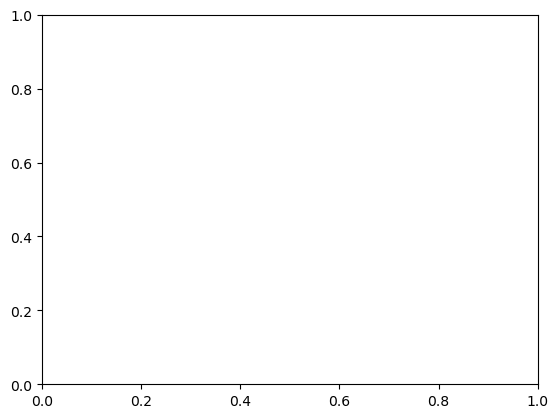

In [8]:
#Using Customer Reviews as a Proxy for Sales: Correlation Coefficient
# Create a single plot to combine all datasets
fig, ax = plt.subplots()

# Store correlation coefficients
correlations = []

# Assess relationship between num_reviews(sales) and price
for name, path in file_paths.items():
    print(f"Dataset: {name}")

    # Read the dataset
    try:
        dataset = pd.read_csv(path, encoding='latin')
        # Select the desired columns
        dataset = dataset[desired_columns]

        # Drop rows with missing values in the "num_reviews(sales)" and "price" columns
        dataset = dataset.dropna(subset=["num_reviews(sales)", "price"])

        # Remove currency symbol from "price" column
        dataset["price"] = dataset["price"].str.replace(r"[^\d.]", "").astype(float)

        # Calculate correlation coefficient
        correlation = dataset["num_reviews(sales)"].corr(dataset["price"])

        # Append the dataset name and correlation coefficient to the results list
        results.append({"Dataset": name, "Correlation Coefficient": correlation})

        # Append correlation coefficient to the list
        correlations.append(correlation)

        # Plot scatter plot with trend line
        sns.regplot(x="num_reviews(sales)", y="price", data=dataset, scatter=True, ci=None, line_kws={'color': 'red'}, ax=ax)

    except FileNotFoundError:
        print(f"File not found: {path}")
    except pd.errors.EmptyDataError:
        print(f"Empty or corrupted file: {path}")
    except KeyError:
        print(f"Missing columns in {name}")

# Calculate average correlation
average_correlation = sum(correlations) / len(correlations)

# Annotate plot with average correlation coefficient
plt.text(0.8, 0.1, f'Average Correlation: {average_correlation:.2f}', ha='center', va='center', transform=ax.transAxes)

# Set plot labels and title
plt.xlabel("Number of Reviews (Sales)")
plt.ylabel("Price")
plt.title("Relationship between Number of Reviews and Price")

# Show the plot
plt.show()

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the tabulated data
print("Correlation Analysis:")
print(results_df)


In [9]:

# Using Customer Reviews as a Proxy for Sales: Hypothesis Testing
for name, path in file_paths.items():
    dataset_results = {}
    dataset_results["Dataset"] = name

    try:
        dataset = pd.read_csv(path, encoding='latin')
        # Select the desired columns
        dataset = dataset[desired_columns]

        # Drop rows with missing values in the "num_reviews(sales)" and "price" columns
        dataset = dataset.dropna(subset=["num_reviews(sales)", "price"])

        # Remove currency symbol from "price" column
        dataset["price"] = dataset["price"].str.replace(r"[^\d.]", "").astype(float)

        # Perform t-test
        t_stat, p_value = stats.ttest_ind(dataset["num_reviews(sales)"], dataset["price"])

        # Add the t-statistic and p-value to the results
        dataset_results["T-statistic"] = t_stat
        dataset_results["P-value"] = p_value

        # Append the dataset results to the overall results list
        results.append(dataset_results)

    except FileNotFoundError:
        print(f"File not found: {path}")
    except pd.errors.EmptyDataError:
        print(f"Empty or corrupted file: {path}")
    except KeyError:
        print(f"Missing columns in {name}")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(results_df["Dataset"], results_df["P-value"], color='b')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel("Dataset")
plt.ylabel("P-value")
plt.title("Hypothesis Testing: Relationship between num_reviews(sales) and price")
plt.tight_layout()
plt.show()
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print()

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/1461599968.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["price"] = dataset["price"].str.replace(r"[^\d.]", "").astype(float)


NameError: name 'results' is not defined

In [9]:
#Checking for Missing Values
for name, df in df_dict.items():
    print(f"\n{name} dataset missing values:")
    print(df.isnull().sum())



NameError: name 'df_dict' is not defined

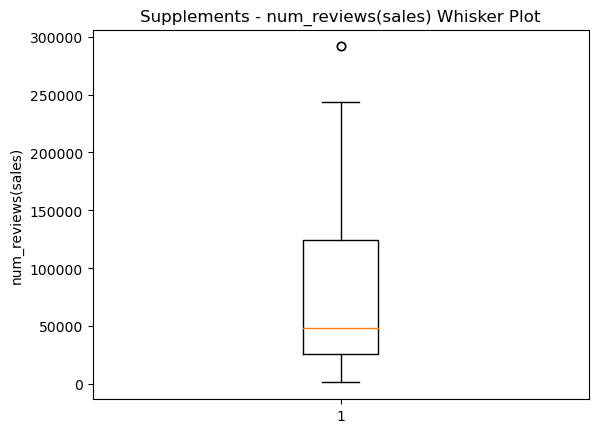

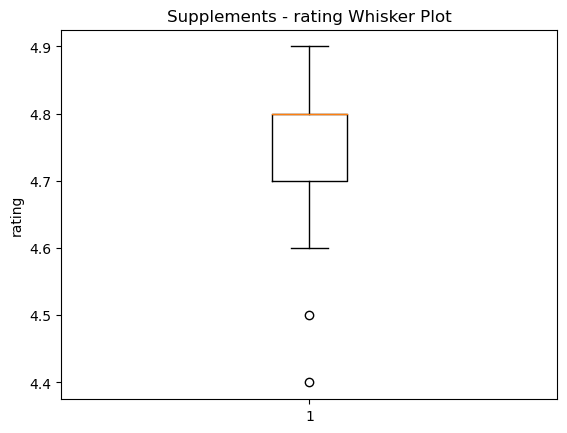

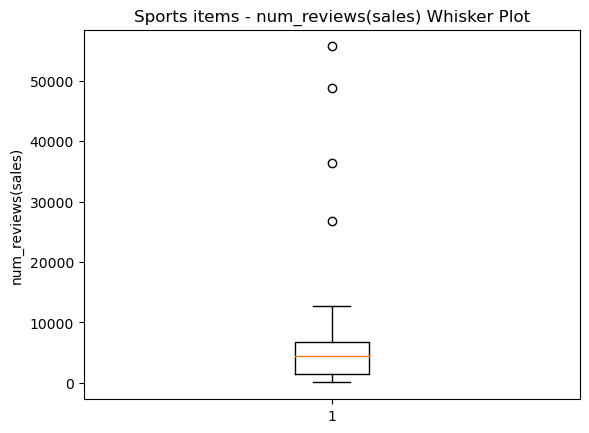

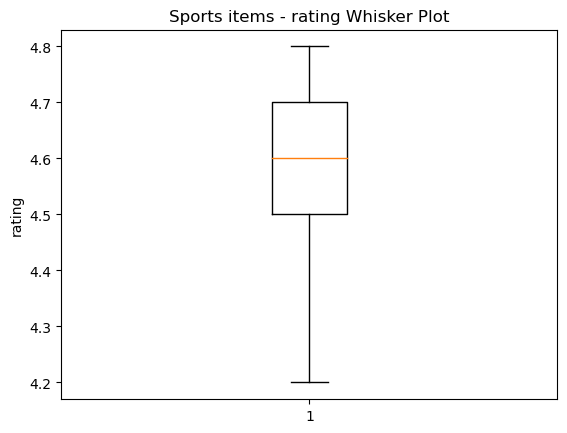

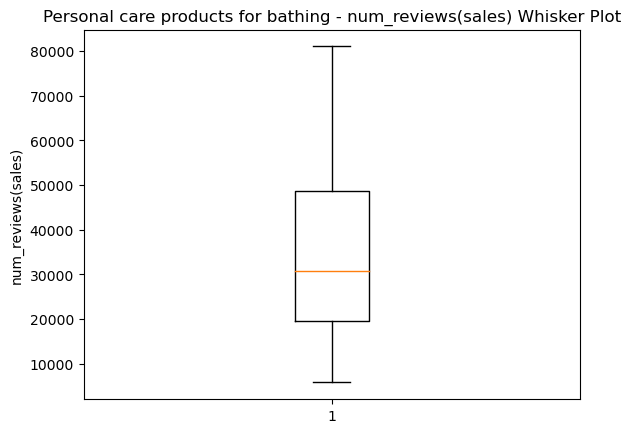

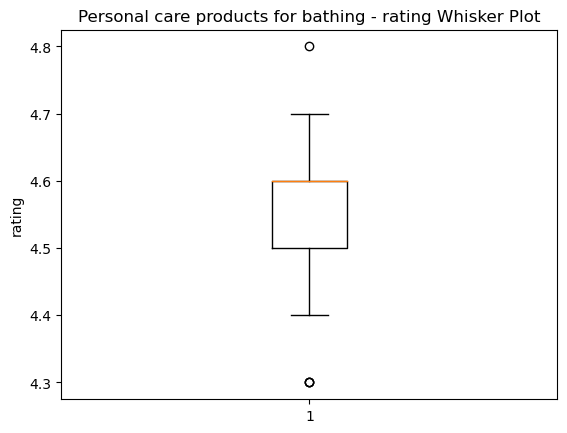

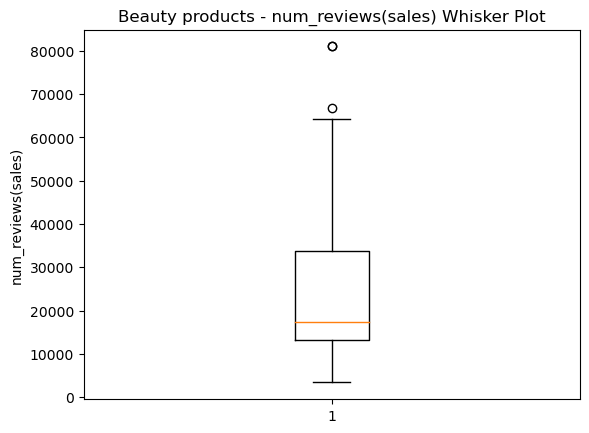

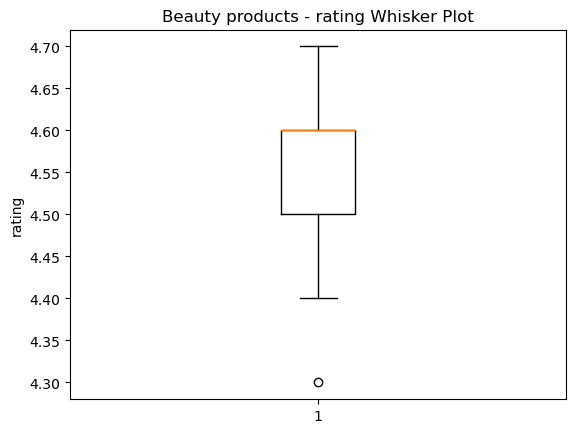

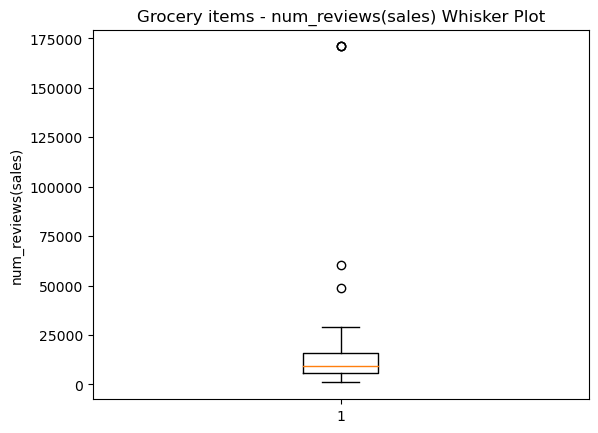

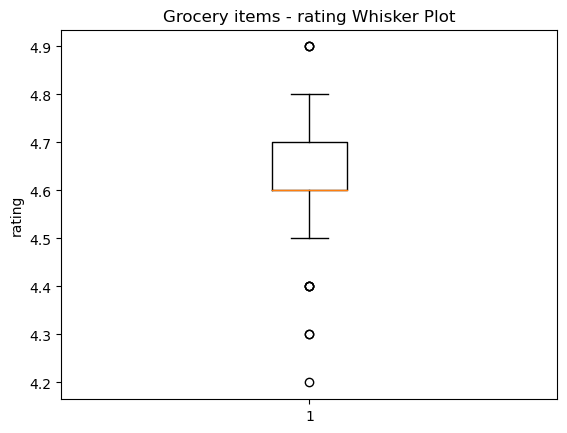

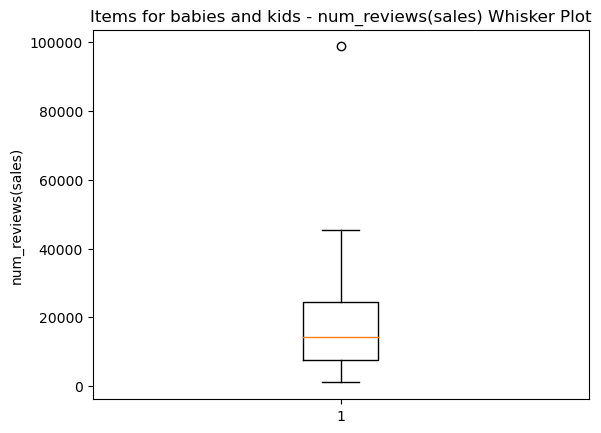

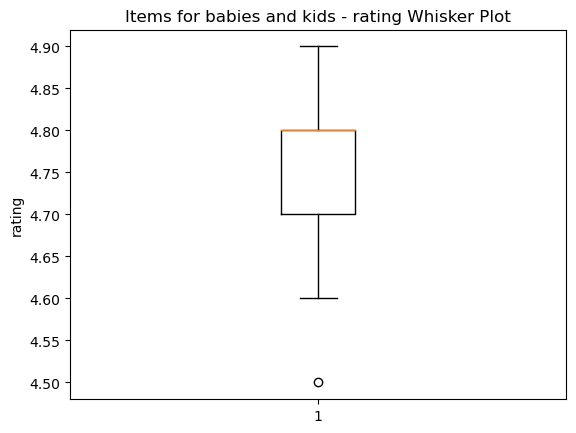

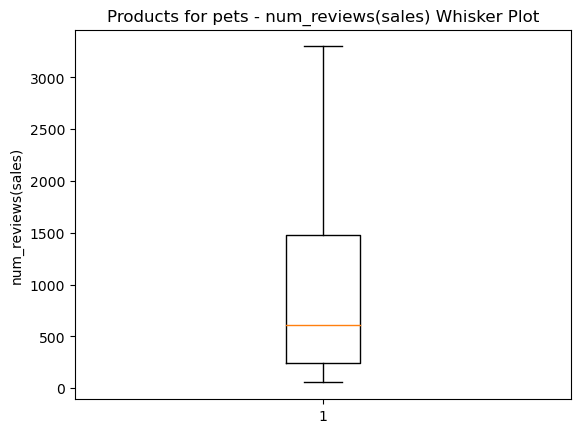

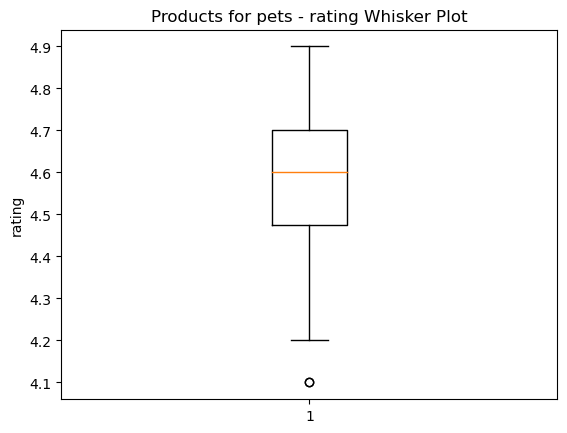

In [27]:
#Outliers Analysis: Box Plots

# Define the variable names
num_reviews_var = "num_reviews(sales)"
rating_var = "rating"

# Iterate over each dataset
for name, dataset in datasets.items():
    # Create a new figure and axes for each category
    fig, ax = plt.subplots()
    
    # Plot whisker plot for num_reviews
    ax.boxplot(dataset[num_reviews_var])
    ax.set_ylabel(num_reviews_var)
    ax.set_title(f"{name} - {num_reviews_var} Whisker Plot")
    
    # Show the plot
    plt.show()
    
    # Create a new figure and axes for each category
    fig, ax = plt.subplots()
    
    # Plot whisker plot for rating
    ax.boxplot(dataset[rating_var])
    ax.set_ylabel(rating_var)
    ax.set_title(f"{name} - {rating_var} Whisker Plot")
    
    # Show the plot
    plt.show()

In [10]:
#Outliers Analysis: Tables
import pandas as pd

# Create an empty DataFrame to store outlier figures
outlier_figures = pd.DataFrame(columns=['Product Category', 'Variable', 'Lower Fence', 'Upper Fence', 'Number of Outliers'])

# Perform outliers analysis for all product categories
for name, dataset in datasets.items():
    print(f"Product Category: {name}")
    
    # Outliers analysis for num_reviews(sales)
    num_reviews_lower_fence = dataset['num_reviews(sales)'].quantile(0.25) - 1.5 * (dataset['num_reviews(sales)'].quantile(0.75) - dataset['num_reviews(sales)'].quantile(0.25))
    num_reviews_upper_fence = dataset['num_reviews(sales)'].quantile(0.75) + 1.5 * (dataset['num_reviews(sales)'].quantile(0.75) - dataset['num_reviews(sales)'].quantile(0.25))
    num_reviews_outliers = dataset[(dataset['num_reviews(sales)'] < num_reviews_lower_fence) | (dataset['num_reviews(sales)'] > num_reviews_upper_fence)]
    num_reviews_num_outliers = num_reviews_outliers.shape[0]
    
    # Add outlier figures to the DataFrame
    outlier_figures = outlier_figures.append({
        'Product Category': name,
        'Variable': 'num_reviews(sales)',
        'Lower Fence': num_reviews_lower_fence,
        'Upper Fence': num_reviews_upper_fence,
        'Number of Outliers': num_reviews_num_outliers
    }, ignore_index=True)
    
    # Outliers analysis for rating
    rating_lower_fence = dataset['rating'].quantile(0.25) - 1.5 * (dataset['rating'].quantile(0.75) - dataset['rating'].quantile(0.25))
    rating_upper_fence = dataset['rating'].quantile(0.75) + 1.5 * (dataset['rating'].quantile(0.75) - dataset['rating'].quantile(0.25))
    rating_outliers = dataset[(dataset['rating'] < rating_lower_fence) | (dataset['rating'] > rating_upper_fence)]
    rating_num_outliers = rating_outliers.shape[0]
    
    # Add outlier figures to the DataFrame
    outlier_figures = outlier_figures.append({
        'Product Category': name,
        'Variable': 'rating',
        'Lower Fence': rating_lower_fence,
        'Upper Fence': rating_upper_fence,
        'Number of Outliers': rating_num_outliers
    }, ignore_index=True)

# Display the outlier figures table
print("Outlier Figures:")
print(outlier_figures)


Product Category: Supplements
Product Category: Sports items
Product Category: Personal care products for bathing
Product Category: Beauty products
Product Category: Grocery items
Product Category: Items for babies and kids
Product Category: Products for pets
Outlier Figures:
                      Product Category            Variable  Lower Fence  \
0                          Supplements  num_reviews(sales) -121591.0000   
1                          Supplements              rating       4.5500   
2                         Sports items  num_reviews(sales)   -6603.3750   
3                         Sports items              rating       4.2000   
4   Personal care products for bathing  num_reviews(sales)  -24137.2500   
5   Personal care products for bathing              rating       4.3500   
6                      Beauty products  num_reviews(sales)  -17365.5000   
7                      Beauty products              rating       4.3500   
8                        Grocery items  num_revi

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2477999025.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_figures = outlier_figures.append({
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2477999025.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_figures = outlier_figures.append({
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2477999025.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_figures = outlier_figures.append({
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2477999025.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out

EXPLORATORY AND POPULARITY ANALYSIS

Dataset: Supplements
Summary Statistics:
       num_reviews(sales)     rating      price
count           48.000000  48.000000  48.000000
mean         86456.395833   4.772917  10.206875
std          79468.701542   0.104657   6.564273
min           1535.000000   4.400000   0.830000
25%          26132.000000   4.700000   4.490000
50%          48437.000000   4.800000   8.815000
75%         124614.000000   4.800000  15.477500
max         291442.000000   4.900000  24.730000
Average Price: 10.21
Total Sales: 4149907
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


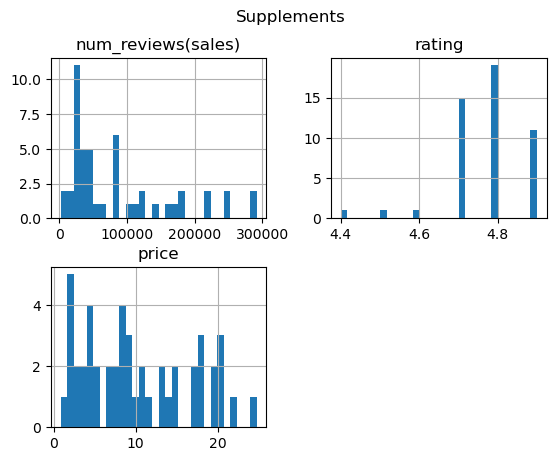

Dataset: Sports items
Summary Statistics:
       num_reviews(sales)     rating      price
count           48.000000  48.000000  48.000000
mean          7427.979167   4.604167  23.678542
std          11503.660179   0.157045  13.123790
min             63.000000   4.200000   2.650000
25%           1397.250000   4.500000  13.387500
50%           4472.500000   4.600000  23.650000
75%           6731.000000   4.700000  28.750000
max          55707.000000   4.800000  63.030000
Average Price: 23.68
Total Sales: 356543
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


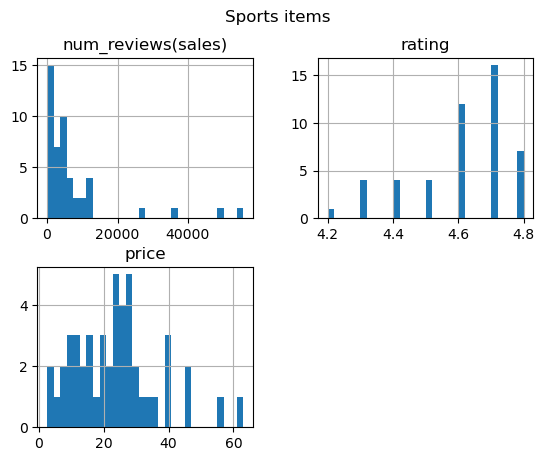

Dataset: Personal care products for bathing
Summary Statistics:
       num_reviews(sales)     rating      price
count           48.000000  48.000000  48.000000
mean         34139.854167   4.562500   6.772708
std          18336.844634   0.110367   4.579172
min           5839.000000   4.300000   1.500000
25%          19594.500000   4.500000   2.767500
50%          30701.000000   4.600000   5.625000
75%          48749.000000   4.600000   9.252500
max          81005.000000   4.800000  19.980000
Average Price: 6.77
Total Sales: 1638713
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


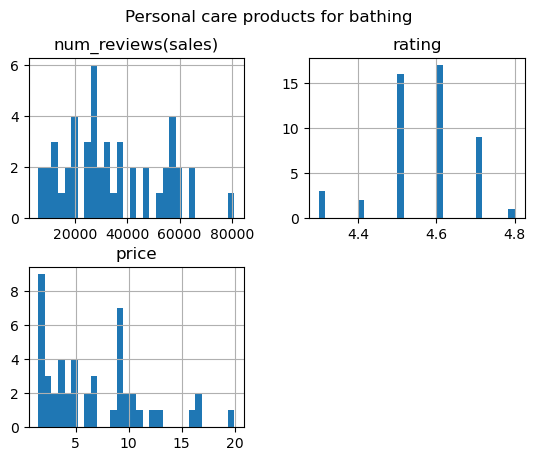

Dataset: Beauty products
Summary Statistics:
       num_reviews(sales)     rating     price
count           48.000000  48.000000  48.00000
mean         26280.833333   4.562500   8.43750
std          19928.330684   0.102366   6.22712
min           3406.000000   4.300000   0.83000
25%          13294.500000   4.500000   3.33250
50%          17446.500000   4.600000   8.20500
75%          33734.500000   4.600000  11.01750
max          81005.000000   4.700000  31.08000
Average Price: 8.44
Total Sales: 1261480
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


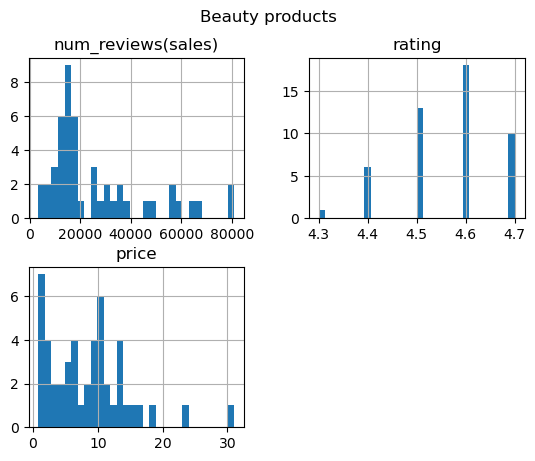

Dataset: Grocery items
Summary Statistics:
       num_reviews(sales)     rating     price
count           48.000000  48.000000  48.00000
mean         22106.895833   4.631250   5.80875
std          40344.535354   0.159995   3.23436
min            987.000000   4.200000   1.53000
25%           5784.250000   4.600000   3.94250
50%           9158.000000   4.600000   4.56000
75%          16046.750000   4.700000   6.74000
max         170893.000000   4.900000  14.98000
Average Price: 5.81
Total Sales: 1061131
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


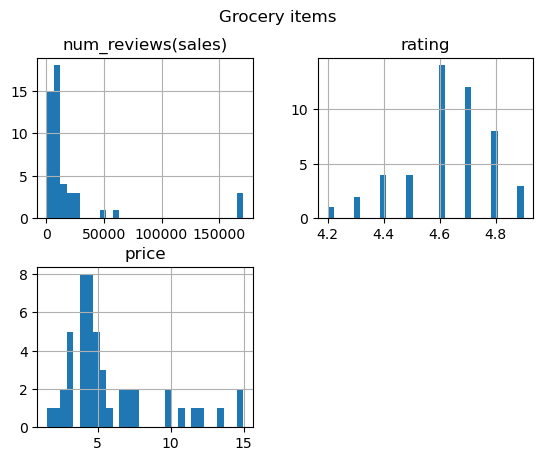

Dataset: Items for babies and kids
Summary Statistics:
       num_reviews(sales)     rating      price
count           48.000000  48.000000  48.000000
mean         18206.104167   4.754167   9.489167
std          16250.862431   0.084949   5.909146
min           1051.000000   4.500000   2.510000
25%           7489.500000   4.700000   4.637500
50%          14175.000000   4.800000   8.595000
75%          24421.000000   4.800000  11.252500
max          98750.000000   4.900000  29.370000
Average Price: 9.49
Total Sales: 873893
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


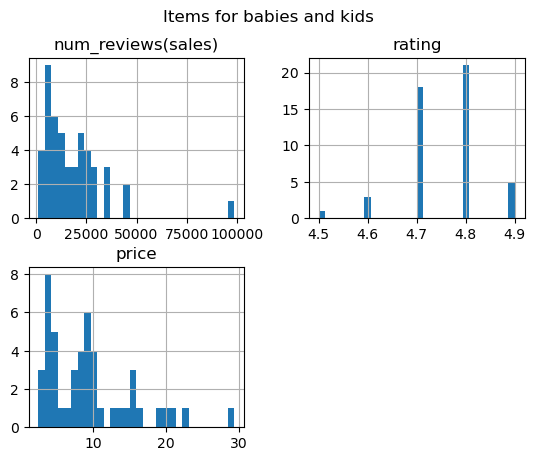

Dataset: Products for pets
Summary Statistics:
       num_reviews(sales)     rating      price
count           48.000000  48.000000  48.000000
mean           908.666667   4.558333   8.975833
std            783.165924   0.195517   5.491362
min             56.000000   4.100000   3.940000
25%            245.500000   4.475000   5.652500
50%            611.000000   4.600000   7.425000
75%           1478.000000   4.700000  10.152500
max           3299.000000   4.900000  34.690000
Average Price: 8.98
Total Sales: 43616
Total Reviews: 48



/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)
/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2665669991.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['price'] = pd.to_numeric(numeric_df['price'])


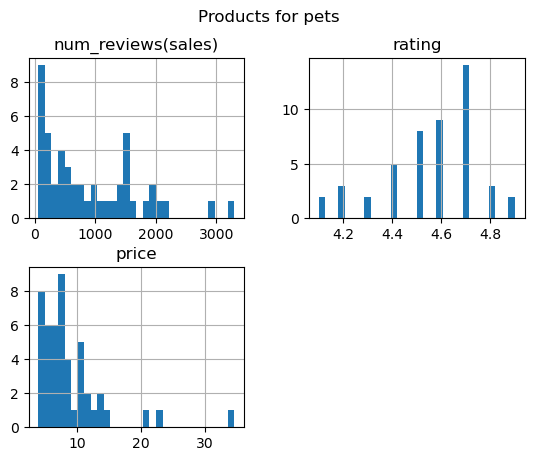

In [6]:
# Univariate Analysis
for name, df in datasets.items():
    print(f"Dataset: {name}")
    try:
        # Select the numerical columns
        numeric_columns = ['num_reviews(sales)', 'rating', 'price']
        numeric_df = df[numeric_columns]

        # Remove non-numeric characters from price column
        numeric_df['price'] = numeric_df['price'].str.replace(r'[^\d.]+', '', regex=True)

        # Convert price column to numeric
        numeric_df['price'] = pd.to_numeric(numeric_df['price'])

        # Calculate average price, number of sales, and number of reviews
        average_price = numeric_df['price'].mean()
        total_sales = numeric_df['num_reviews(sales)'].sum()
        total_reviews = numeric_df['num_reviews(sales)'].count()

        # Generate summary statistics table
        summary_table = numeric_df.describe()

        # Display the table, average price, number of sales, and number of reviews
        print("Summary Statistics:")
        print(summary_table)
        print(f"Average Price: {average_price:.2f}")
        print(f"Total Sales: {total_sales}")
        print(f"Total Reviews: {total_reviews}")
        print()

        # Plot histograms
        numeric_df.hist(bins=30)
        plt.suptitle(name)
        plt.show()

    except KeyError as e:
        print(f"Missing columns in {name}: {str(e)}")


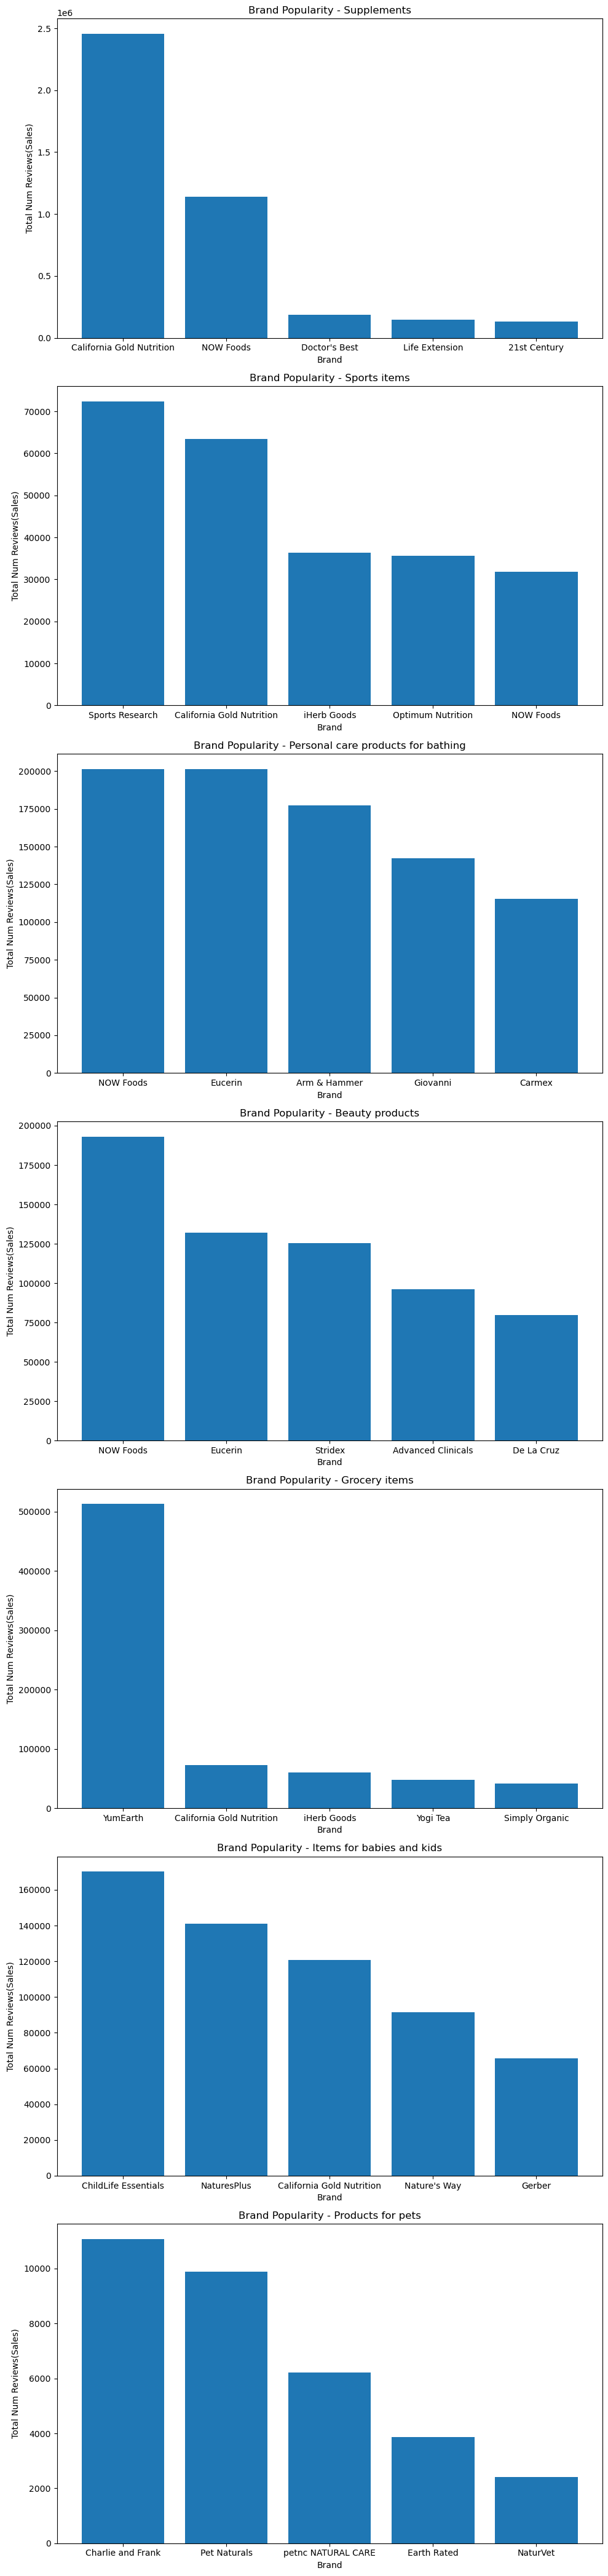

Brand Popularity Table:
                      Product Category                      Brand  \
0                          Supplements  California Gold Nutrition   
1                          Supplements                  NOW Foods   
2                          Supplements              Doctor's Best   
3                          Supplements             Life Extension   
4                          Supplements               21st Century   
5                         Sports items            Sports Research   
6                         Sports items  California Gold Nutrition   
7                         Sports items                iHerb Goods   
8                         Sports items          Optimum Nutrition   
9                         Sports items                  NOW Foods   
10  Personal care products for bathing                  NOW Foods   
11  Personal care products for bathing                    Eucerin   
12  Personal care products for bathing               Arm & Hammer   
13  Person

In [30]:
#Brand Popularity

import matplotlib.pyplot as plt
import pandas as pd

# Define a dictionary to store brand popularity
brand_popularity = {}

# Iterate over the datasets
for name, dataset in datasets.items():
    # Convert the 'num_reviews(sales)' column to numeric type
    dataset['num_reviews(sales)'] = pd.to_numeric(dataset['num_reviews(sales)'], errors='coerce')
    # Group the data by brand_name and sum the num_reviews(sales)
    brand_data = dataset.groupby("brand_name")["num_reviews(sales)"].sum()
    # Sort the brand_data in descending order and select the top 5 brands
    top_brands = brand_data.sort_values(ascending=False).head(5)
    # Store the brand popularity in the dictionary
    brand_popularity[name] = top_brands

# Plot the brand popularity for each dataset
fig, axes = plt.subplots(nrows=len(brand_popularity), figsize=(10, 6 * len(brand_popularity)))

for i, (name, popularity) in enumerate(brand_popularity.items()):
    ax = axes[i]
    ax.bar(popularity.index, popularity.values)
    ax.set_xlabel("Brand")
    ax.set_ylabel("Total Num Reviews(Sales)")
    ax.set_title(f"Brand Popularity - {name}")

plt.tight_layout()
plt.show()

# Generate a table for the brand popularity results
table_data = []
for name, popularity in brand_popularity.items():
    for brand, value in popularity.items():
        table_data.append([name, brand, value])
table_columns = ["Product Category", "Brand", "Total Num Reviews(Sales)"]
table_df = pd.DataFrame(table_data, columns=table_columns)
print("Brand Popularity Table:")
print(table_df)



In [11]:
#Most popular products
most_popular_products = df_all.groupby(['brand_name', 'product_name']).agg({
    'num_review(sales)': 'sum'
}).sort_values(by='num_review(sales)', ascending=False)

print("Most popular products overall:")
print(most_popular_products.head(10))

NameError: name 'df_all' is not defined

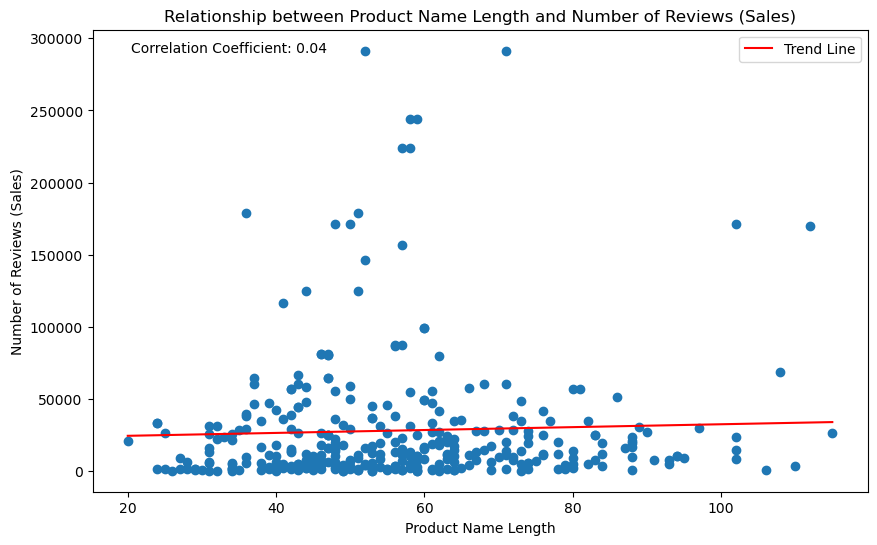

In [33]:
#Product Name Length
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create empty lists to store the data
name_lengths = []
num_reviews = []

# Iterate over each dataset
for dataset in datasets.values():
    # Calculate the length of the product names
    dataset['name_length'] = dataset['product_name'].str.len()
    
    # Append the data to the lists
    name_lengths.extend(dataset['name_length'])
    num_reviews.extend(dataset['num_reviews(sales)'])

# Calculate the correlation coefficient
correlation_coef = np.corrcoef(name_lengths, num_reviews)[0, 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(name_lengths, num_reviews)
plt.xlabel('Product Name Length')
plt.ylabel('Number of Reviews (Sales)')
plt.title('Relationship between Product Name Length and Number of Reviews (Sales)')

# Add a trend line
slope, intercept, _, _, _ = stats.linregress(name_lengths, num_reviews)
x = np.linspace(min(name_lengths), max(name_lengths), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Trend Line')

# Display the correlation coefficient
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coef:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.legend()
plt.show()

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_1486/2285126941.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_dataset["price"] = combined_dataset["price"].str.replace(r"[^\d.]", "").astype(float)


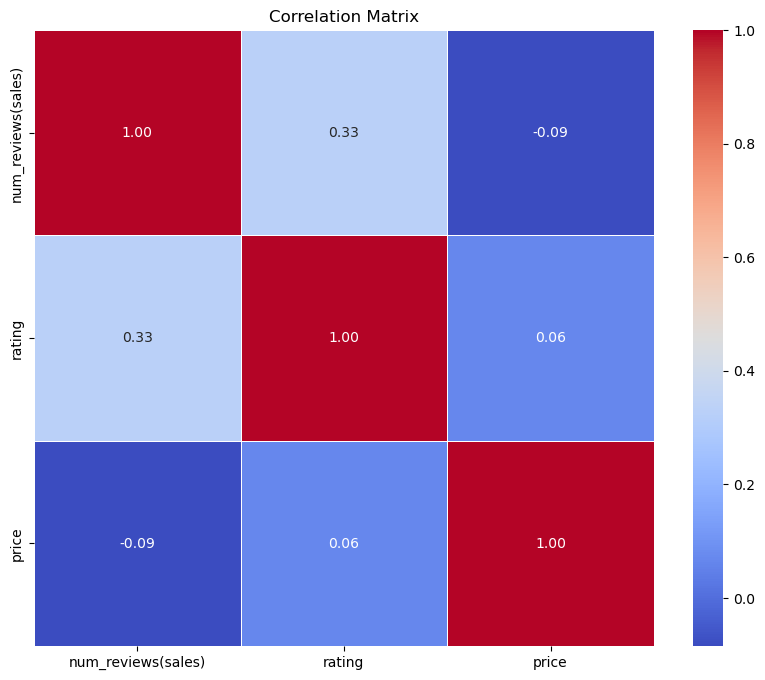

In [21]:

# Combine all datasets into a single DataFrame
combined_dataset = pd.concat(datasets.values())

# Remove currency symbol from "price" column
combined_dataset["price"] = combined_dataset["price"].str.replace(r"[^\d.]", "").astype(float)

# Calculate the correlation matrix
correlation_matrix = combined_dataset[correlation_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



In [22]:
# Print each pair of variables with its correlation
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        print(f"Correlation between {col} and {idx} is {correlation_matrix[col][idx]:.2f}")


Correlation between num_reviews(sales) and num_reviews(sales) is 1.00
Correlation between num_reviews(sales) and rating is 0.33
Correlation between num_reviews(sales) and price is -0.09
Correlation between rating and num_reviews(sales) is 0.33
Correlation between rating and rating is 1.00
Correlation between rating and price is 0.06
Correlation between price and num_reviews(sales) is -0.09
Correlation between price and rating is 0.06
Correlation between price and price is 1.00


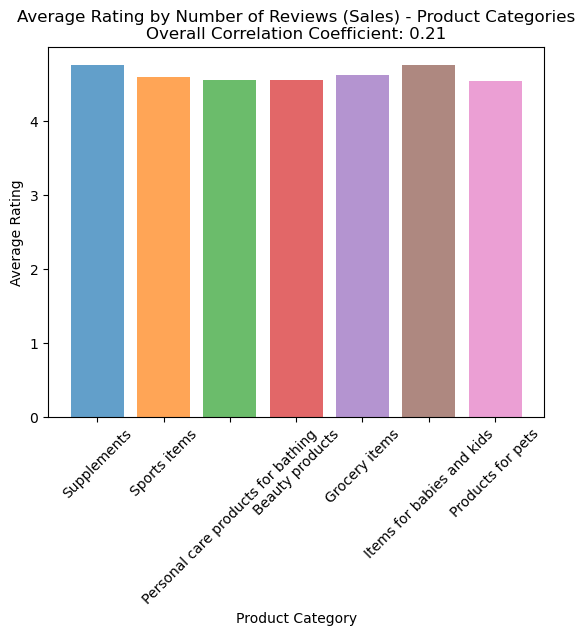

In [38]:
# Calculate the average rating by the number of reviews (sales) for each product category
average_rating_by_reviews = {}
for name, dataset in datasets.items():
    average_rating_by_reviews[name] = dataset.groupby("num_reviews(sales)")["rating"].mean()

# Prepare the data for the bar chart
categories = list(average_rating_by_reviews.keys())
average_ratings = [ratings.mean() for ratings in average_rating_by_reviews.values()]

# Calculate the overall correlation coefficient
overall_correlation = sum([dataset["rating"].corr(pd.Series(dataset["num_reviews(sales)"])) for dataset in datasets.values()]) / len(datasets)

# Plot the bar chart with different colors for each bar
colors = plt.cm.tab10(range(len(categories)))
plt.bar(categories, average_ratings, color=colors, alpha=0.7)

# Set plot labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Average Rating by Number of Reviews (Sales) - Product Categories\nOverall Correlation Coefficient: {:.2f}".format(overall_correlation))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

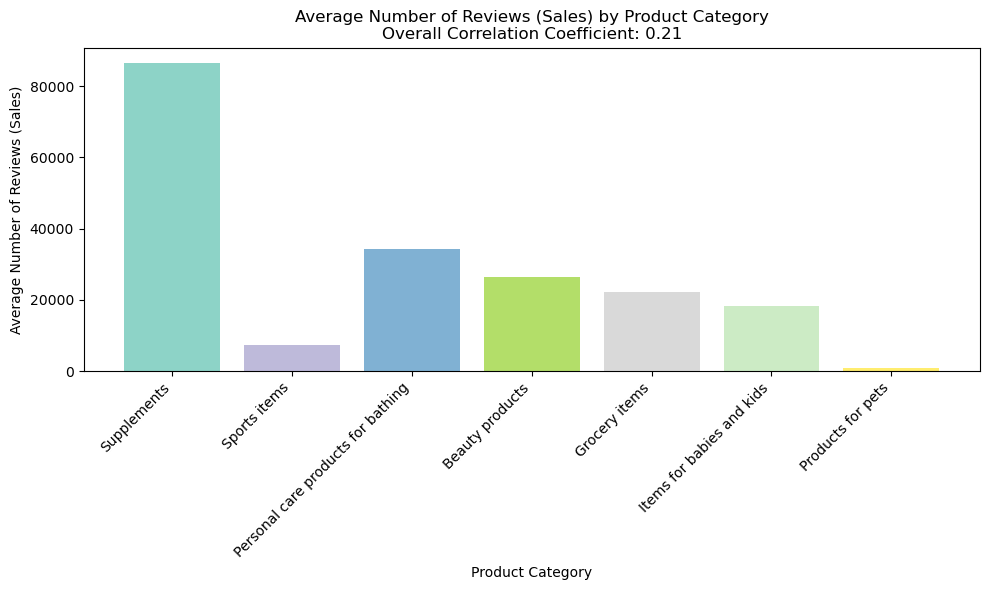

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average number of reviews (sales) for each product category
averages = [dataset["num_reviews(sales)"].mean() for dataset in datasets.values()]

# Calculate the overall correlation coefficient
overall_correlation = sum([dataset["num_reviews(sales)"].corr(pd.Series(dataset["rating"])) for dataset in datasets.values()]) / len(datasets)

# Define the categories and colors
categories = ["Supplements", "Sports items", "Personal care products for bathing", "Beauty products", "Grocery items", "Items for babies and kids", "Products for pets"]
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=colors)

# Set plot labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Number of Reviews (Sales)")
plt.title("Average Number of Reviews (Sales) by Product Category\nOverall Correlation Coefficient: {:.2f}".format(overall_correlation))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar graph
plt.tight_layout()
plt.show()

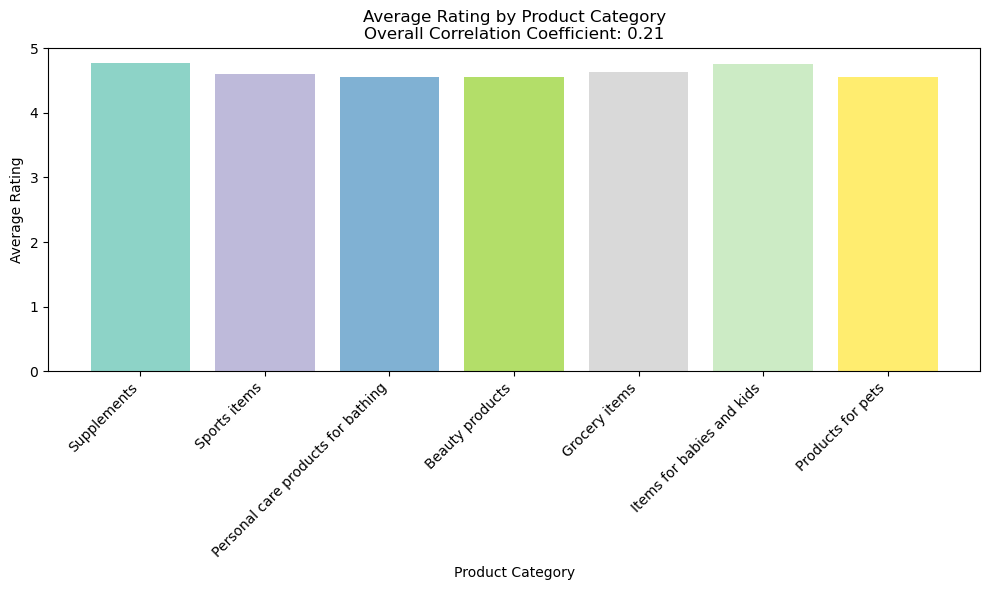

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average rating for each product category
averages = [dataset["rating"].mean() for dataset in datasets.values()]

# Calculate the overall correlation coefficient
overall_correlation = sum([dataset["rating"].corr(pd.Series(dataset["num_reviews(sales)"])) for dataset in datasets.values()]) / len(datasets)

# Define the categories and colors
categories = ["Supplements", "Sports items", "Personal care products for bathing", "Beauty products", "Grocery items", "Items for babies and kids", "Products for pets"]
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=colors)

# Set plot labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Average Rating by Product Category\nOverall Correlation Coefficient: {:.2f}".format(overall_correlation))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar graph
plt.tight_layout()
plt.show()


In [43]:
import re
import pandas as pd

# Function to remove non-numeric characters from price values
def clean_price(price):
    return re.sub(r"[^\d.]", "", price)

# Calculate the average price, average rating, and average reviews (sales) for each product category
averages = []
for name, dataset in datasets.items():
    avg_price = dataset["price"].apply(clean_price).astype(float).mean()
    avg_rating = dataset["rating"].mean()
    avg_reviews = dataset["num_reviews(sales)"].mean()
    averages.append({"Product Category": name, "Average Price": avg_price, "Average Rating": avg_rating, "Average Reviews (Sales)": avg_reviews})

# Create DataFrames from the averages list
avg_price_df = pd.DataFrame(averages)
avg_rating_df = pd.DataFrame(averages)
avg_reviews_df = pd.DataFrame(averages)

# Display the tabulated data
print("Average Price by Product Category:")
print(avg_price_df)

print("\nAverage Rating by Product Category:")
print(avg_rating_df)

print("\nAverage Reviews (Sales) by Product Category:")
print(avg_reviews_df)



Average Price by Product Category:
                     Product Category  Average Price  Average Rating  \
0                         Supplements      10.206875        4.772917   
1                        Sports items      23.678542        4.604167   
2  Personal care products for bathing       6.772708        4.562500   
3                     Beauty products       8.437500        4.562500   
4                       Grocery items       5.808750        4.631250   
5           Items for babies and kids       9.489167        4.754167   
6                   Products for pets       8.975833        4.558333   

   Average Reviews (Sales)  
0             86456.395833  
1              7427.979167  
2             34139.854167  
3             26280.833333  
4             22106.895833  
5             18206.104167  
6               908.666667  

Average Rating by Product Category:
                     Product Category  Average Price  Average Rating  \
0                         Supplements      10.2

CLUSTERING ANALYSIS

In [ ]:
# Combine all datasets into one DataFrame
all_data = [supplements_df, sports_df, bath_personal_care_df, beauty_df, grocery_df, baby_kids_df, pets_df]
all_data_names = [supplements_name, sports_name, bath_personal_care_name, beauty_name, grocery_name, baby_kids_name, pets_name]

combined_df = pd.concat(all_data, keys=all_data_names)

print(combined_df.columns)

Index(['name', 'num_reviews', 'rating', 'price'], dtype='object')


In [ ]:
# Preprocess data (select relevant features, remove missing values, normalize)
selected_features = ['price', 'rating', 'num_reviews']  # Update these with relevant features based on your dataset
preprocessed_df = combined_df[selected_features].dropna()

In [ ]:
# Remove currency symbols and extra spaces from the 'price' column
preprocessed_df['price'] = preprocessed_df['price'].str.replace('£', '').str.strip().astype(float)

scaler = StandardScaler()
preprocessed_df_scaled = scaler.fit_transform(preprocessed_df)

In [ ]:
scaler = StandardScaler()
preprocessed_df_scaled = scaler.fit_transform(preprocessed_df)

/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/anaconda3/li

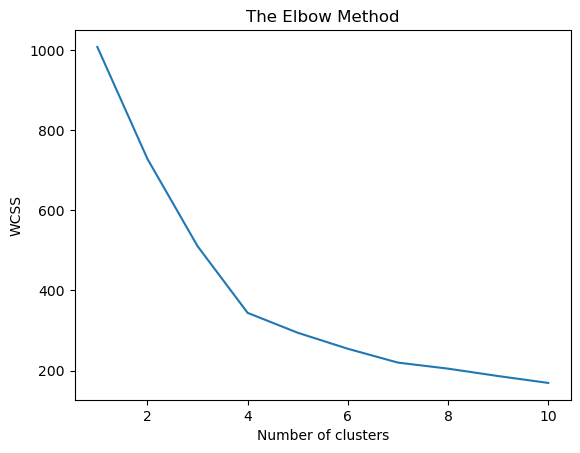

In [ ]:
# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(preprocessed_df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply K-means clustering & Hierarchical clustering
optimal_clusters = 3  # Set this value based on the Elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(preprocessed_df_scaled)

hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(preprocessed_df_scaled)

/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Add the cluster results to the preprocessed_df DataFrame
preprocessed_df['kmeans_clusters'] = kmeans_clusters
preprocessed_df['hc_clusters'] = hc_clusters

# Analyze the results (e.g., cluster centroids, cluster composition)
print("K-means clustering results:")
print(preprocessed_df.groupby('kmeans_clusters')[selected_features].mean())

print("\nHierarchical clustering results:")
print(preprocessed_df.groupby('hc_clusters')[selected_features].mean())

K-means clustering results:
                     price    rating    num_reviews
kmeans_clusters                                    
0                 7.368550  4.614504   18974.187023
1                 7.294286  4.847619  171331.809524
2                27.131887  4.652830   15397.698113

Hierarchical clustering results:
                 price    rating    num_reviews
hc_clusters                                    
0             7.375216  4.601569   18599.482353
1             7.350000  4.850000  166223.090909
2            25.073729  4.700000   16703.508475


In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(preprocessed_df_scaled)

In [ ]:
# Add PCA results to the preprocessed_df DataFrame
preprocessed_df['PCA_x'] = pca_transformed[:, 0]
preprocessed_df['PCA_y'] = pca_transformed[:, 1]

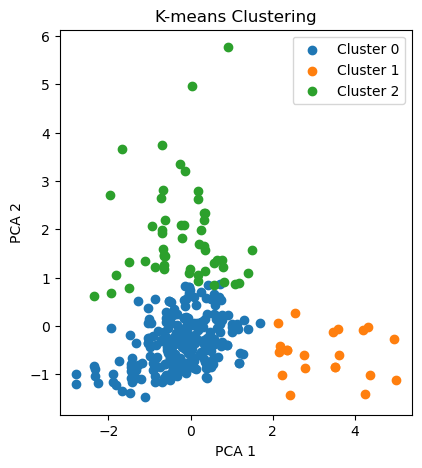

In [ ]:
# Create a scatter plot for K-means clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for i in range(optimal_clusters):
    plt.scatter(
        preprocessed_df.loc[preprocessed_df['kmeans_clusters'] == i, 'PCA_x'],
        preprocessed_df.loc[preprocessed_df['kmeans_clusters'] == i, 'PCA_y'],
        label=f"Cluster {i}"
    )
plt.title("K-means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

NameError: name 'optimal_clusters' is not defined

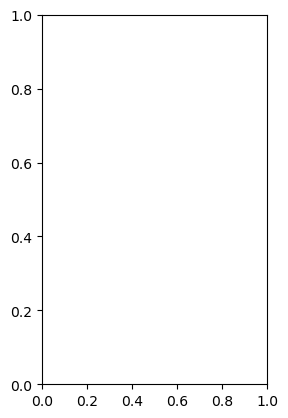

In [56]:
# Create a scatter plot for hierarchical clustering results
plt.subplot(1, 2, 2)
for i in range(optimal_clusters):
    plt.scatter(
        preprocessed_df.loc[preprocessed_df['hc_clusters'] == i, 'PCA_x'],
        preprocessed_df.loc[preprocessed_df['hc_clusters'] == i, 'PCA_y'],
        label=f"Cluster {i}"
    )
plt.title("Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
# Perform Mean Shift Clustering on each dataset
for name, dataset in datasets.items():
    # Preprocess the data
    # Here I'm assuming that 'num_reviews(sales)', 'rating', and 'price' are the columns you want to use for clustering
    data_to_cluster = dataset[["num_reviews(sales)", "rating", "price"]].dropna()  # Drop rows with missing values

    # Normalizing data may be beneficial as 'num_reviews(sales)' and 'price' might be on very different scales
    scaler = StandardScaler()
    data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

    # Create a Mean Shift object
    ms = MeanShift()
    
    # Perform clustering
    ms.fit(data_to_cluster_scaled)
    
    # Add labels to the original DataFrame
    dataset['cluster'] = ms.labels_

    # Print the cluster centers
    print(f"Cluster centers for {name}:")
    print(scaler.inverse_transform(ms.cluster_centers_))  # Convert the centers back to the original scale
    print()


NameError: name 'MeanShift' is not defined

In [54]:
#Mean-shift clustering pairplot
# Convert the labels to a DataFrame for easier manipulation
labels = pd.DataFrame(clustering.labels_, columns=['Cluster'])

# Concatenate original data and labels
df_supplements_clustered = pd.concat([df_supplements.reset_index(), labels], axis=1)

# Draw pairplot
sns.pairplot(df_supplements_clustered, hue='Cluster', vars=["num_reviews(sales)", "rating", "price"])
plt.show()

NameError: name 'clustering' is not defined

In [ ]:
#Spectral Clustering

# For each dataset, perform the following
for name, dataset in datasets.items():
    # Define the data to be used for clustering
    X = dataset[["num_reviews(sales)", "rating", "price"]]

    # Standardize the features to have mean=0 and variance=1
    X_std = StandardScaler().fit_transform(X)

    # Assume the number of clusters as 2 for simplicity, you can adjust this number based on your specific problem
    spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

    # Fit and predict cluster labels for the dataset
    spectral_labels = spectral_clustering.fit_predict(X_std)

    # Append the cluster labels to your original DataFrame
    dataset['cluster'] = spectral_labels

    # Print out the first few rows of each clustered dataset
    print(f"Clustered {name} dataset:")
    print(dataset.head())
    print()

    # Loop through each category's dataset
for name, dataset in datasets.items():
    plt.figure(figsize=(10,7))
    plt.scatter(dataset['num_reviews(sales)'], dataset['price'], c=dataset['cluster'])
    plt.title(f"Spectral Clustering for {name}")
    plt.xlabel('Number of Reviews (Sales)')
    plt.ylabel('Price')
    plt.show()

Clustered Supplements dataset:
                                                name  num_reviews(sales)  \
0  California Gold Nutrition, Gold C, USP Grade V...              243815   
1  California Gold Nutrition, Omega-3 Premium Fis...              291442   
2  California Gold Nutrition, Vitamin D3, 125 mcg...              223710   
3  California Gold Nutrition, LactoBif Probiotics...               86590   
4  California Gold Nutrition, Vitamin D3, 125 mcg...              223710   

   rating  price                 brand_name  \
0     4.8   2.64  California Gold Nutrition   
1     4.8   6.99  California Gold Nutrition   
2     4.9  13.58  California Gold Nutrition   
3     4.7  19.97  California Gold Nutrition   
4     4.9   4.19  California Gold Nutrition   

                                        product_name  cluster  
0   Gold C, USP Grade Vitamin C, 1,000 mg, 60 Veg...        0  
1   Omega-3 Premium Fish Oil, 180 EPA / 120 DHA, ...        0  
2   Vitamin D3, 125 mcg (5,000 IU), 3

PREDICTIVE MODELLING

Dataset: Supplements
Mean Squared Error:  3223821938.96213
R2 Score:  0.14947916620272717
Dataset: Sports items
Mean Squared Error:  56130233.40702909
R2 Score:  -4.307293292681132
Dataset: Personal care products for bathing
Mean Squared Error:  246797666.0145464
R2 Score:  0.011580448977542068
Dataset: Beauty products
Mean Squared Error:  310411233.7812091
R2 Score:  -0.11784431531405404
Dataset: Grocery items
Mean Squared Error:  1714714162.9875956
R2 Score:  0.26785421148968713
Dataset: Items for babies and kids
Mean Squared Error:  145417655.30698195
R2 Score:  -0.013285687412538882
Dataset: Products for pets
Mean Squared Error:  931587.8397760295
R2 Score:  -0.08241380380516095


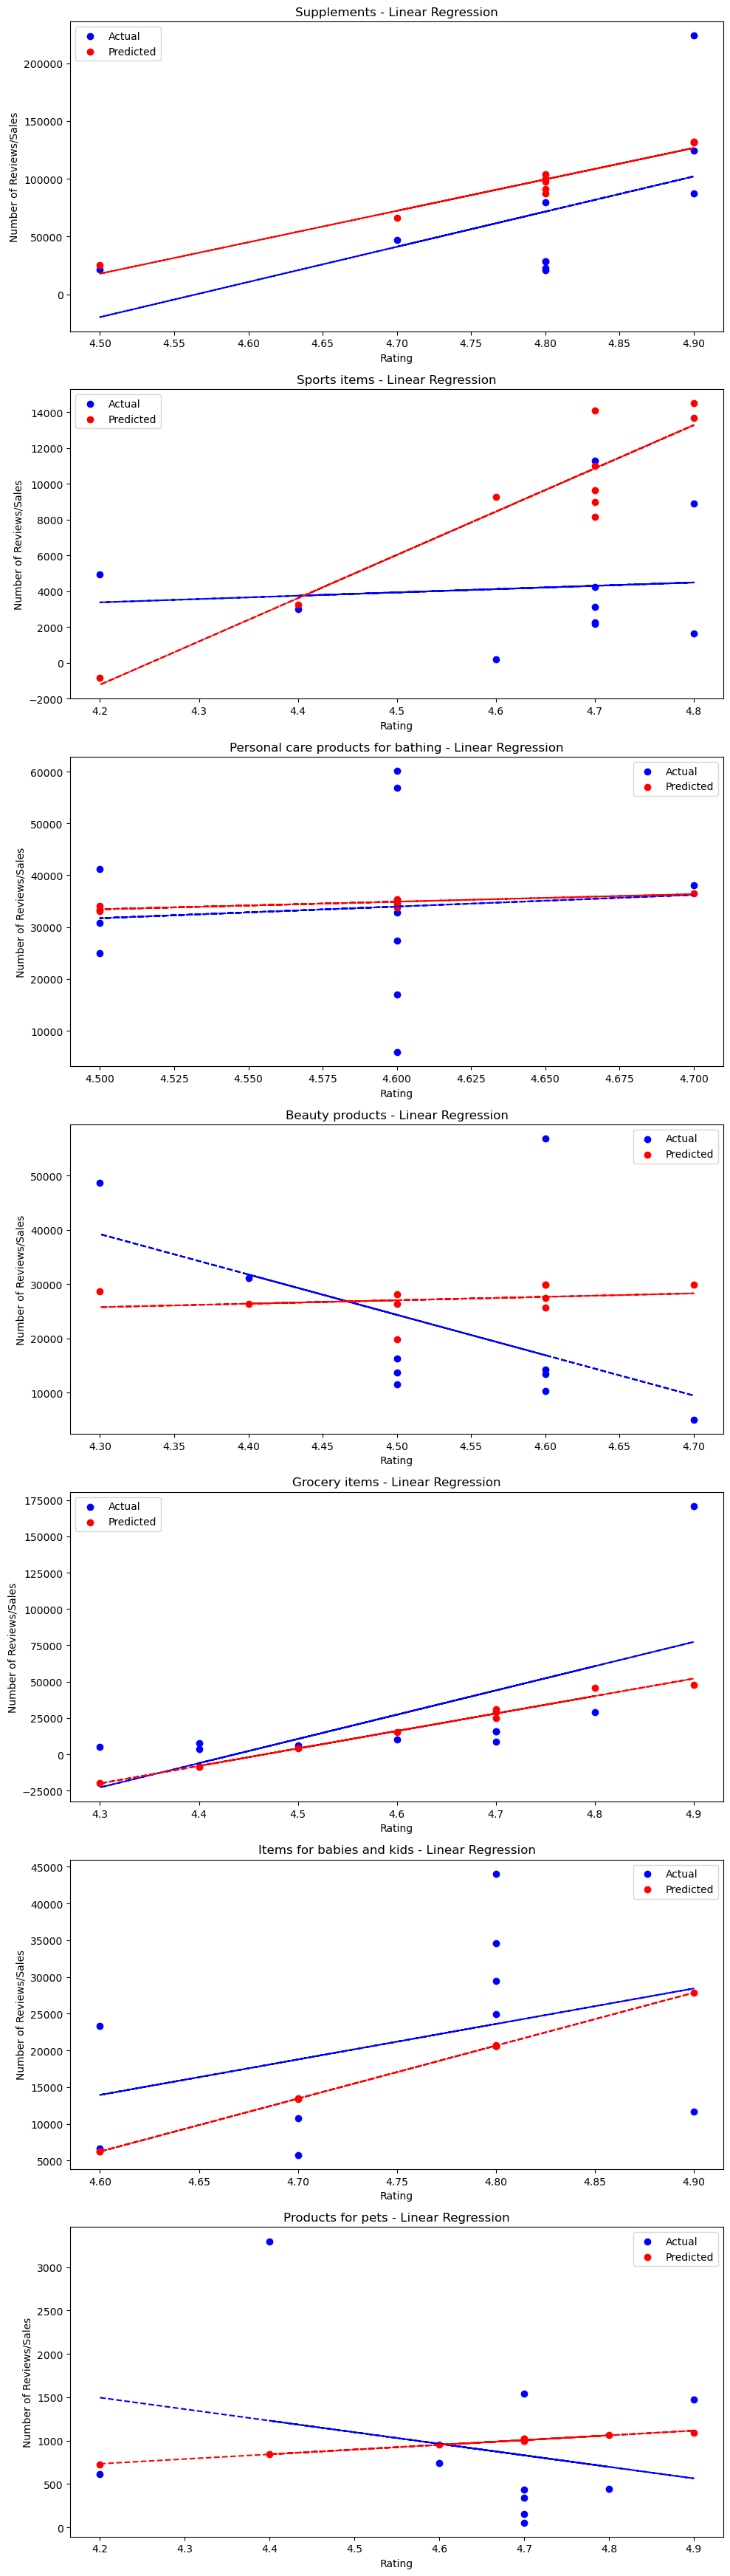

In [53]:
# Linear Regression:reviews(sales) vs rating
# Initiate subplots
fig, ax = plt.subplots(7, 1, figsize=(10, 35))
ax = ax.flatten() # flatten the axes object so it can be indexed in 1D

# Perform linear regression for each dataset
for i, (name, dataset) in enumerate(datasets.items()):
    print(f"Dataset: {name}")
    
    # Check if 'price' column is of type string, if not convert it to string
    if dataset['price'].dtypes != 'object':
        dataset['price'] = dataset['price'].astype(str)
    
    # Clean and convert the 'price' column
    dataset['price'] = dataset['price'].str.replace(r'[^0-9.]', '', regex=True).str.strip().astype(float)
    
    # Select the features (independent variables) and target variable
    X = dataset[["rating", "price"]]
    y = dataset["num_reviews(sales)"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot the actual vs. predicted values
    ax[i].scatter(X_test["rating"], y_test, color='blue', label="Actual")
    ax[i].scatter(X_test["rating"], y_pred, color='red', label="Predicted")
    
    # Create the actual trendline
    z = np.polyfit(X_test["rating"], y_test, 1)
    p = np.poly1d(z)
    ax[i].plot(X_test["rating"], p(X_test["rating"]), "b--")

    # Create the predicted trendline
    z_pred = np.polyfit(X_test["rating"], y_pred, 1)
    p_pred = np.poly1d(z_pred)
    ax[i].plot(X_test["rating"], p_pred(X_test["rating"]), "r--")

    ax[i].set_xlabel("Rating")
    ax[i].set_ylabel("Number of Reviews/Sales")
    ax[i].set_title(f"{name} - Linear Regression")
    ax[i].legend()
    
    # Print the evaluation metrics
    print("Mean Squared Error: ", mse)
    print("R2 Score: ", r2)

# Adjust plot layout and save the figure
plt.tight_layout()
plt.savefig("linear_regression_graphs.png")
plt.show()



Dataset: Supplements
Mean Squared Error:  4134361407.7091355
R2 Score:  -0.09074278241188782
Dataset: Sports items
Mean Squared Error:  34532282.66529433
R2 Score:  -2.26513789532068
Dataset: Personal care products for bathing
Mean Squared Error:  248164448.91776362
R2 Score:  0.0061065117018812565
Dataset: Beauty products
Mean Squared Error:  305845330.4989347
R2 Score:  -0.10140171120404373
Dataset: Grocery items
Mean Squared Error:  2432165803.5885735
R2 Score:  -0.038482091355453774
Dataset: Items for babies and kids
Mean Squared Error:  152237476.97611904
R2 Score:  -0.06080693009420868
Dataset: Products for pets
Mean Squared Error:  861107.1274103109
R2 Score:  -0.0005221209070498389


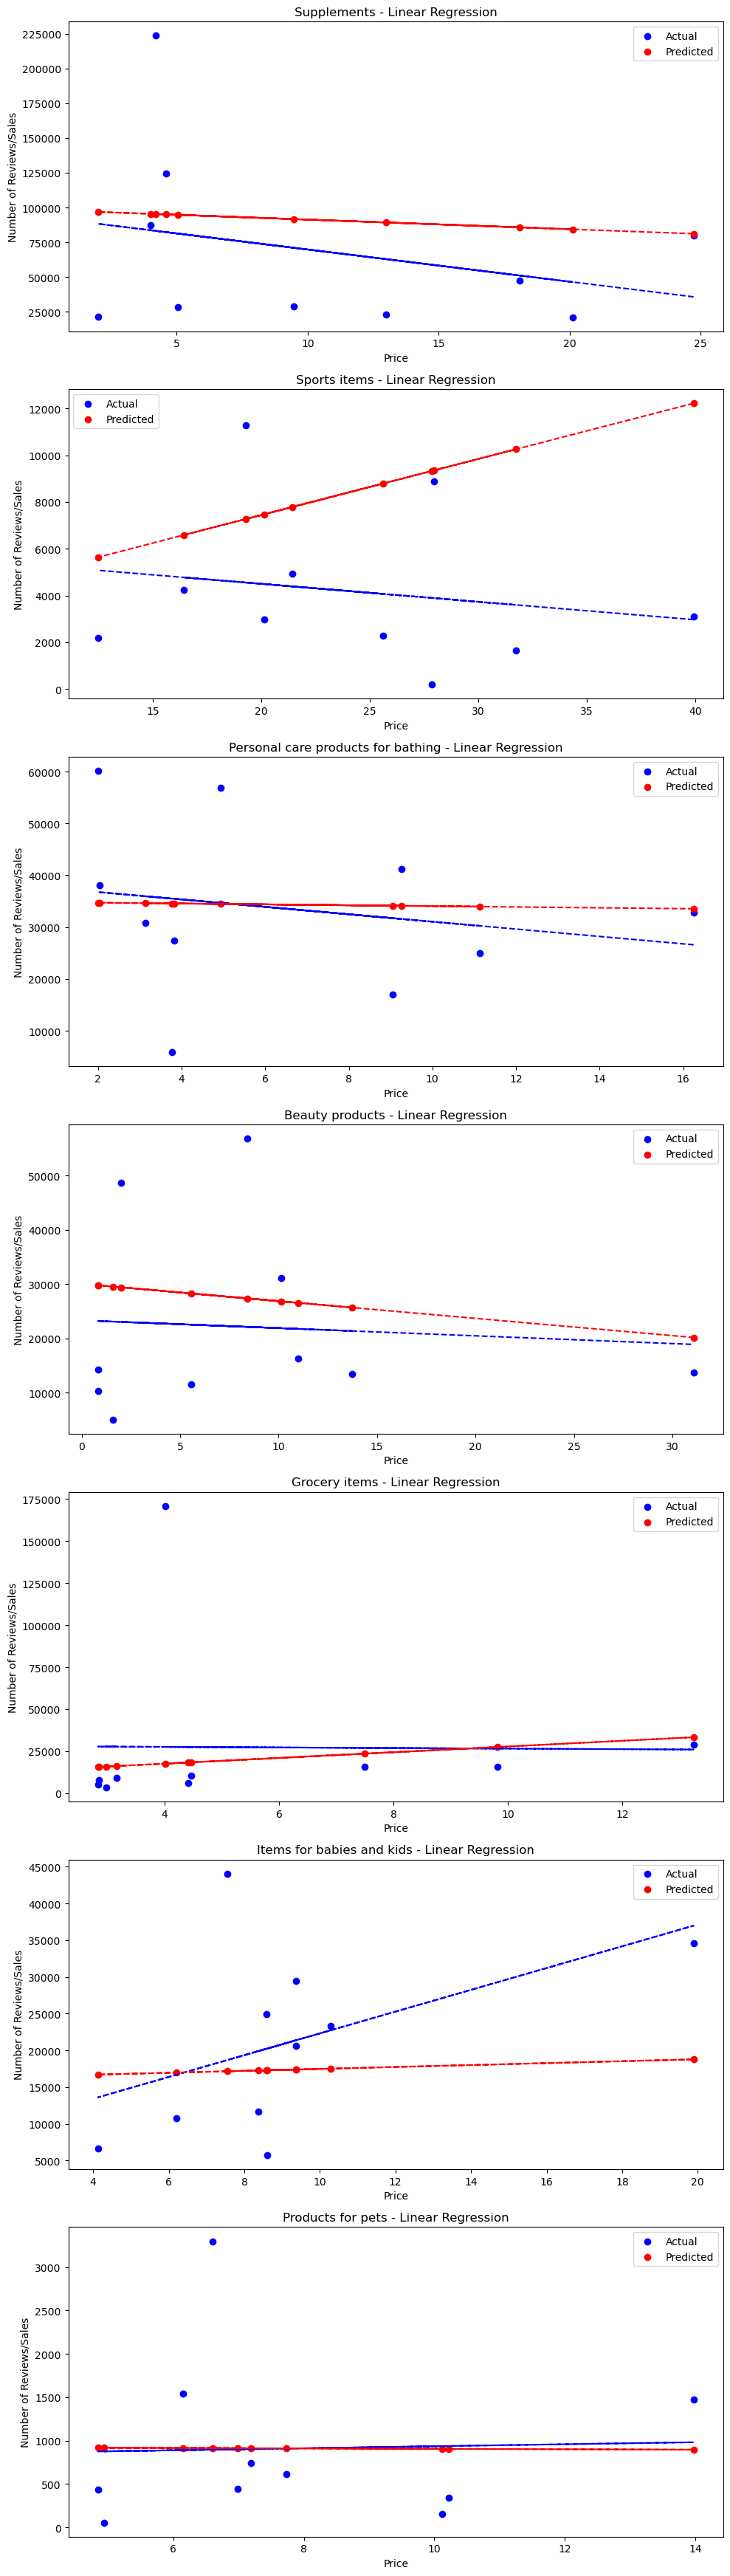

In [26]:
# Linear Regression: reviews(sales) vs price
# Initiate subplots
fig, ax = plt.subplots(7, 1, figsize=(10, 35))
ax = ax.flatten() # Flatten the axes object so it can be indexed in 1D

# Perform linear regression for each dataset
for i, (name, dataset) in enumerate(datasets.items()):
    print(f"Dataset: {name}")
    
    # Check if 'price' column is of type string, if not convert it to string
    if dataset['price'].dtypes != 'object':
        dataset['price'] = dataset['price'].astype(str)
    
    # Clean and convert the 'price' column
    dataset['price'] = dataset['price'].str.replace(r'[^0-9.]', '', regex=True).str.strip().astype(float)
    
    # Select the features (independent variables) and target variable
    X = dataset[["price"]] # changed from rating to price
    y = dataset["num_reviews(sales)"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot the actual vs. predicted values
    ax[i].scatter(X_test["price"], y_test, color='blue', label="Actual") # changed from rating to price
    ax[i].scatter(X_test["price"], y_pred, color='red', label="Predicted") # changed from rating to price
    
    # Create the actual trendline
    z = np.polyfit(X_test["price"], y_test, 1)
    p = np.poly1d(z)
    ax[i].plot(X_test["price"], p(X_test["price"]), "b--")

    # Create the predicted trendline
    z_pred = np.polyfit(X_test["price"], y_pred, 1)
    p_pred = np.poly1d(z_pred)
    ax[i].plot(X_test["price"], p_pred(X_test["price"]), "r--")
    
    ax[i].set_xlabel("Price")
    ax[i].set_ylabel("Number of Reviews/Sales")
    ax[i].set_title(f"{name} - Linear Regression")
    ax[i].legend()
    
    # Print the evaluation metrics
    print("Mean Squared Error: ", mse)
    print("R2 Score: ", r2)

# Adjust plot layout and save the figure
plt.tight_layout()
plt.savefig("linear_regression_graphs.png")
plt.show()


Dataset: Supplements
Mean Squared Error:  0.011291071981549609
R2 Score:  0.12472310220545779
Dataset: Sports items
Mean Squared Error:  0.03396909117247452
R2 Score:  -0.05822713932942536
Dataset: Personal care products for bathing
Mean Squared Error:  0.004084250345112953
R2 Score:  -0.13451398475359944
Dataset: Beauty products
Mean Squared Error:  0.013815896978013113
R2 Score:  -0.14180966760439073
Dataset: Grocery items
Mean Squared Error:  0.0237086707813341
R2 Score:  0.3026861534901737
Dataset: Items for babies and kids
Mean Squared Error:  0.007659883646231438
R2 Score:  0.09883721809042112
Dataset: Products for pets
Mean Squared Error:  0.05165122002369556
R2 Score:  -0.41898956109053764


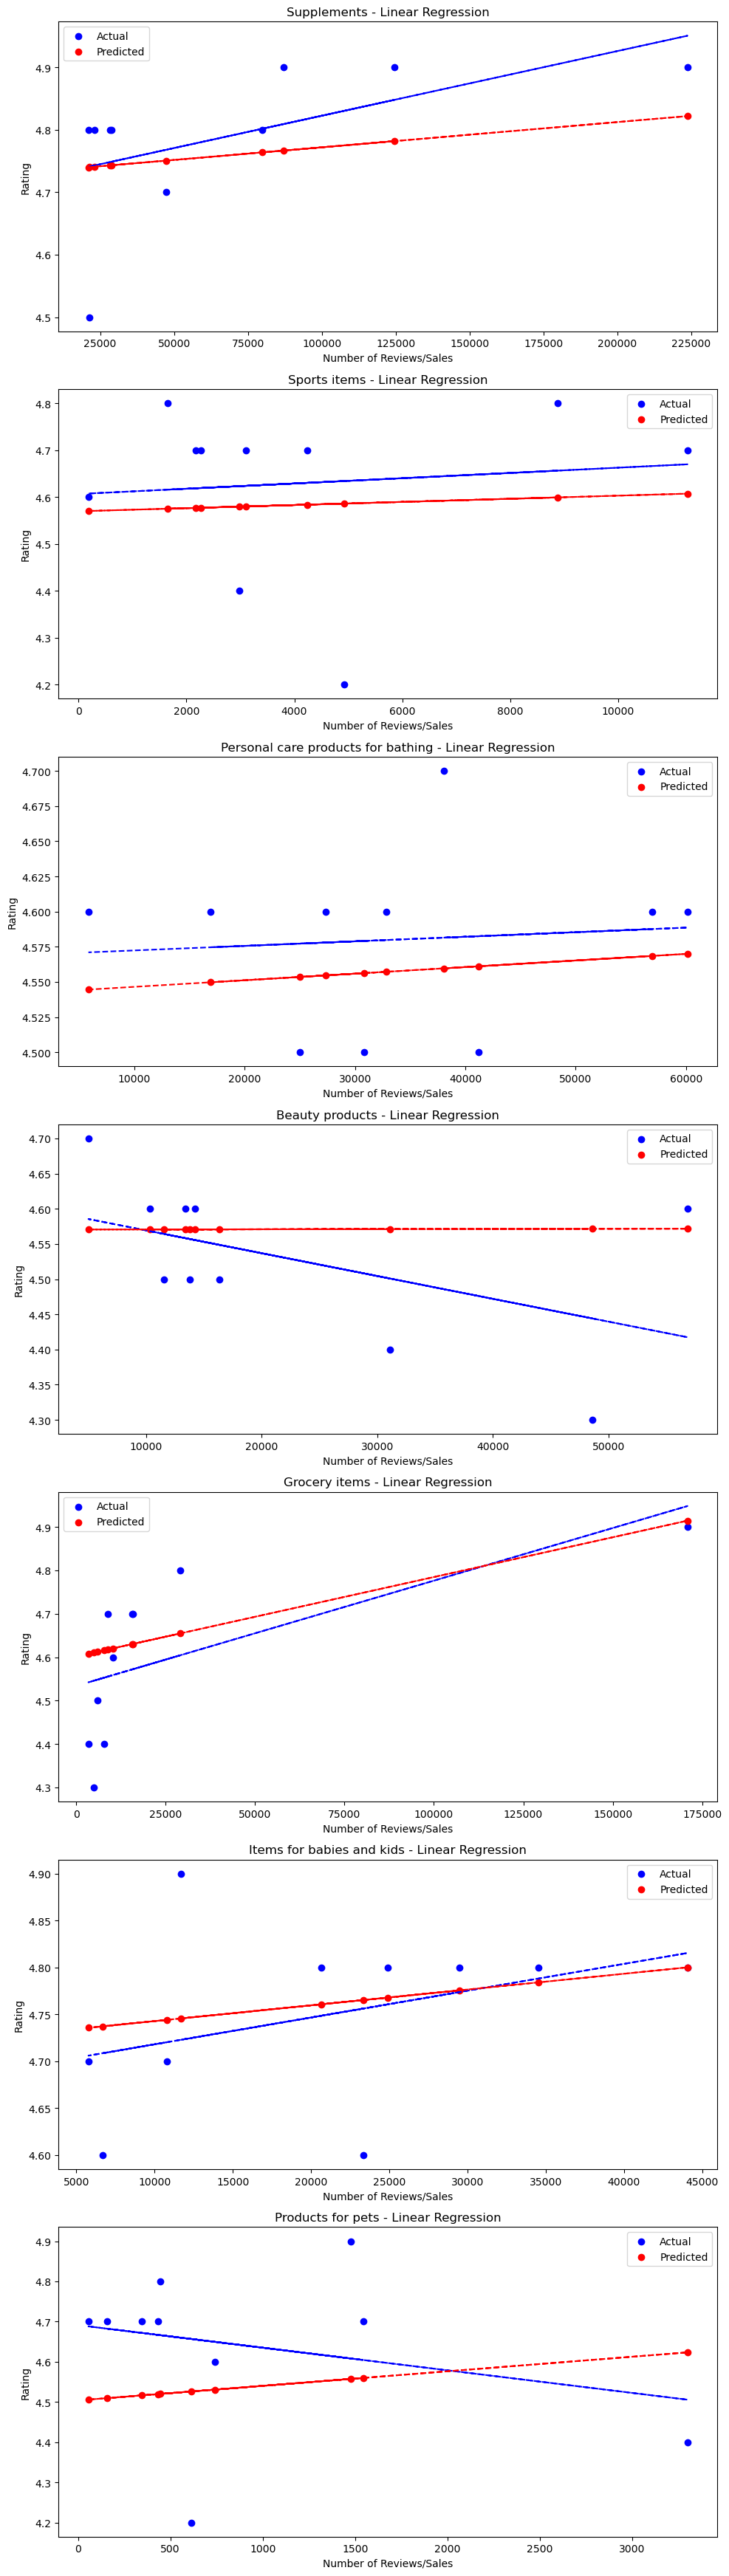

In [27]:
# Linear Regression: price vs rating
# Initiate subplots
fig, ax = plt.subplots(7, 1, figsize=(10, 35))
ax = ax.flatten() # flatten the axes object so it can be indexed in 1D

# Perform linear regression for each dataset
for i, (name, dataset) in enumerate(datasets.items()):
    print(f"Dataset: {name}")
    
    # Check if 'price' column is of type string, if not convert it to string
    if dataset['price'].dtypes != 'object':
        dataset['price'] = dataset['price'].astype(str)
    
    # Clean and convert the 'price' column
    dataset['price'] = dataset['price'].str.replace(r'[^0-9.]', '', regex=True).str.strip().astype(float)
    
    # Select the features (independent variables) and target variable
    X = dataset[["num_reviews(sales)"]]
    y = dataset["rating"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot the actual vs. predicted values
    ax[i].scatter(X_test["num_reviews(sales)"], y_test, color='blue', label="Actual")
    ax[i].scatter(X_test["num_reviews(sales)"], y_pred, color='red', label="Predicted")
    
    # Create the actual trendline
    z = np.polyfit(X_test["num_reviews(sales)"], y_test, 1)
    p = np.poly1d(z)
    ax[i].plot(X_test["num_reviews(sales)"], p(X_test["num_reviews(sales)"]), "b--")

    # Create the predicted trendline
    z_pred = np.polyfit(X_test["num_reviews(sales)"], y_pred, 1)
    p_pred = np.poly1d(z_pred)
    ax[i].plot(X_test["num_reviews(sales)"], p_pred(X_test["num_reviews(sales)"]), "r--")

    ax[i].set_xlabel("Number of Reviews/Sales")
    ax[i].set_ylabel("Rating")
    ax[i].set_title(f"{name} - Linear Regression")
    ax[i].legend()
    
    # Print the evaluation metrics
    print("Mean Squared Error: ", mse)
    print("R2 Score: ", r2)

# Adjust plot layout and save the figure
plt.tight_layout()
plt.savefig("linear_regression_graphs.png")
plt.show()


Dataset: Supplements


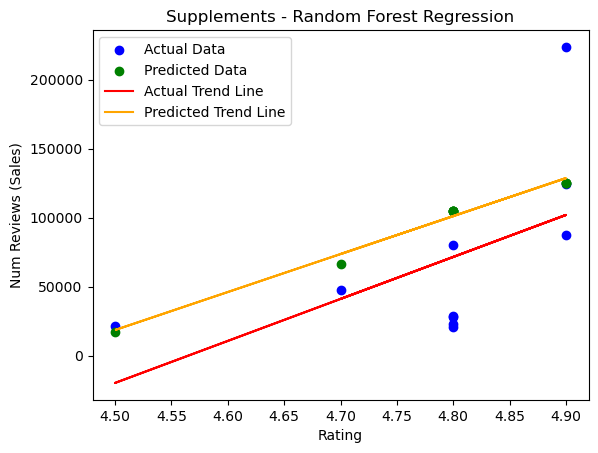

Mean Squared Error: 3763505021.610935
R-squared: 0.007097944742177842

Dataset: Sports items


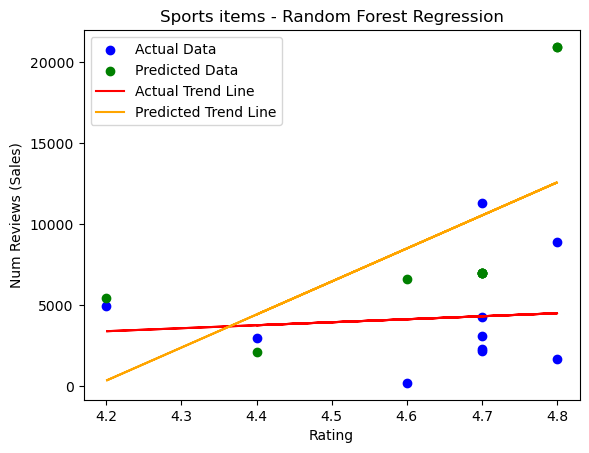

Mean Squared Error: 64547826.53270825
R-squared: -5.10320367510333

Dataset: Personal care products for bathing


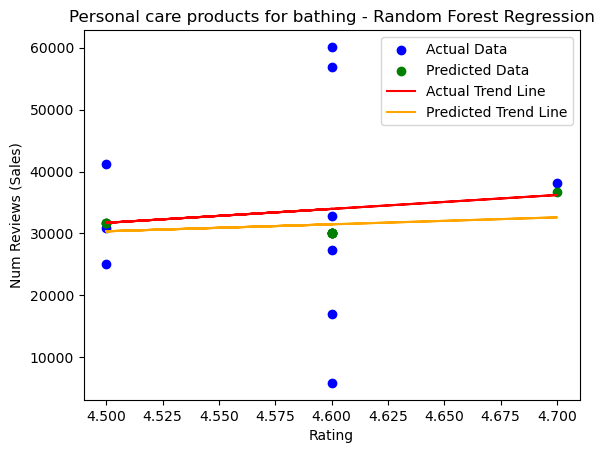

Mean Squared Error: 253692728.33481607
R-squared: -0.016034133092578173

Dataset: Beauty products


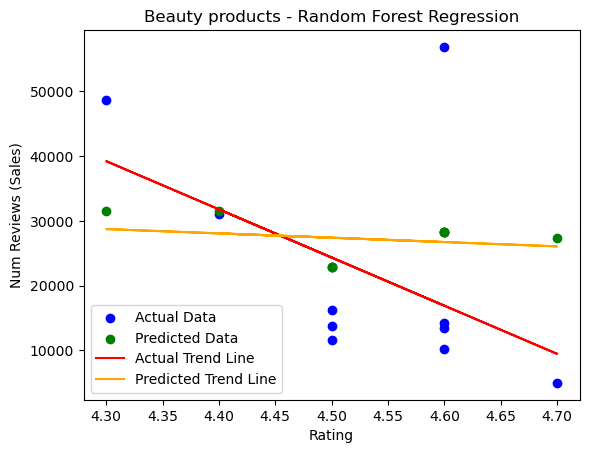

Mean Squared Error: 260493252.83799997
R-squared: 0.06191893149115735

Dataset: Grocery items


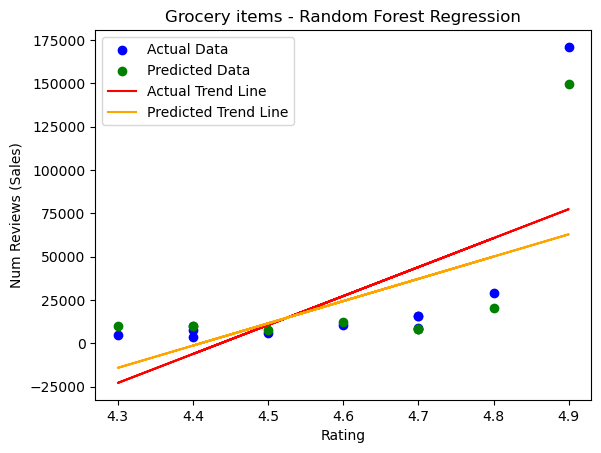

Mean Squared Error: 72882420.05946974
R-squared: 0.968880786048907

Dataset: Items for babies and kids


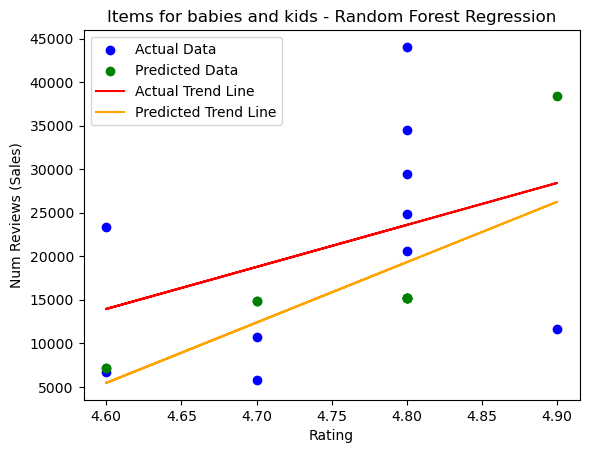

Mean Squared Error: 260883641.8518045
R-squared: -0.8178649615168156

Dataset: Products for pets


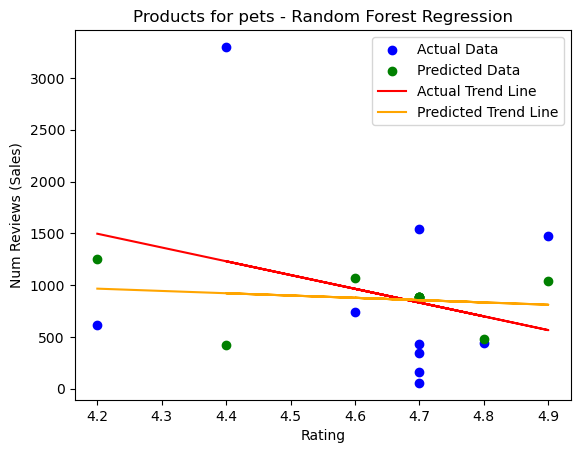

Mean Squared Error: 1111393.44352755
R-squared: -0.29133030012713723

                              Dataset  Mean Squared Error  R-squared
0                         Supplements        3.763505e+09   0.007098
1                        Sports items        6.454783e+07  -5.103204
2  Personal care products for bathing        2.536927e+08  -0.016034
3                     Beauty products        2.604933e+08   0.061919
4                       Grocery items        7.288242e+07   0.968881
5           Items for babies and kids        2.608836e+08  -0.817865
6                   Products for pets        1.111393e+06  -0.291330


In [28]:
# Random Forest Regression: review(sales) vs rating
results = []  # List to store results of each model
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    
    # Select the features (independent variables) and target variable
    X = dataset[["rating"]]  # Using only rating as a feature now
    y = dataset["num_reviews(sales)"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Random Forest Regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2})
    
    # Plot the actual vs. predicted values with a trendline
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.scatter(X_test, y_pred, color='green', label='Predicted Data')
    
    # Create trend lines
    z_actual = np.polyfit(X_test.squeeze(), y_test, 1)
    p_actual = np.poly1d(z_actual)
    
    z_predicted = np.polyfit(X_test.squeeze(), y_pred, 1)
    p_predicted = np.poly1d(z_predicted)
    
    plt.plot(X_test, p_actual(X_test), color='red', label='Actual Trend Line')
    plt.plot(X_test, p_predicted(X_test), color='orange', label='Predicted Trend Line')
    
    plt.xlabel("Rating")
    plt.ylabel("Num Reviews (Sales)")
    plt.title(f"{name} - Random Forest Regression")
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

# Convert results to a DataFrame and print it
results_df = pd.DataFrame(results)
print(results_df)


Dataset: Supplements


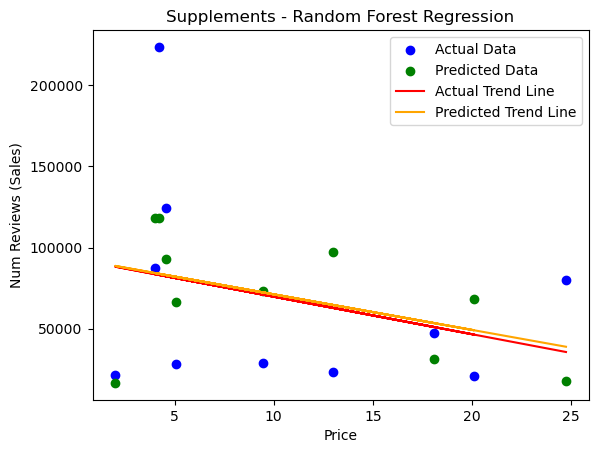

Mean Squared Error: 2839326589.6380343
R-squared: 0.25091817595262167

Dataset: Sports items


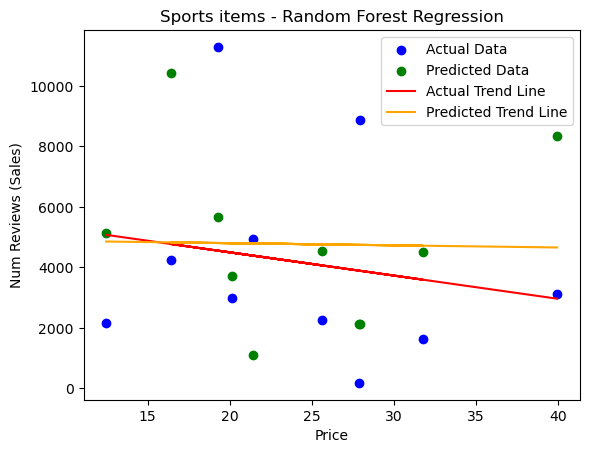

Mean Squared Error: 18415154.60566
R-squared: -0.741211831662653

Dataset: Personal care products for bathing


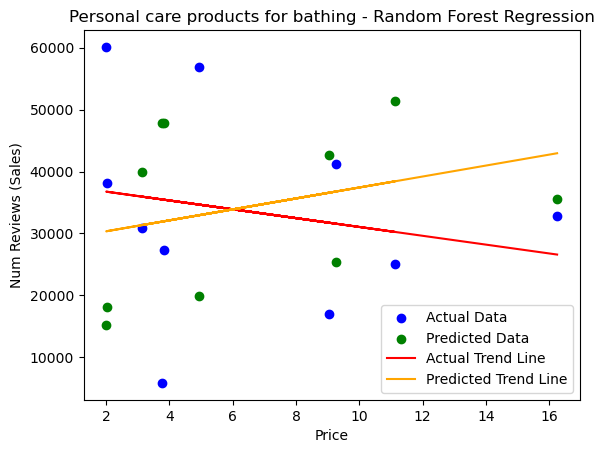

Mean Squared Error: 766490353.2127123
R-squared: -2.069778021081042

Dataset: Beauty products


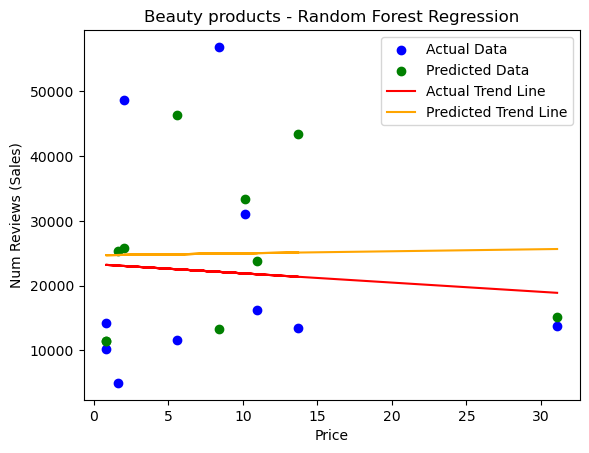

Mean Squared Error: 501898890.0537944
R-squared: -0.8074243456811083

Dataset: Grocery items


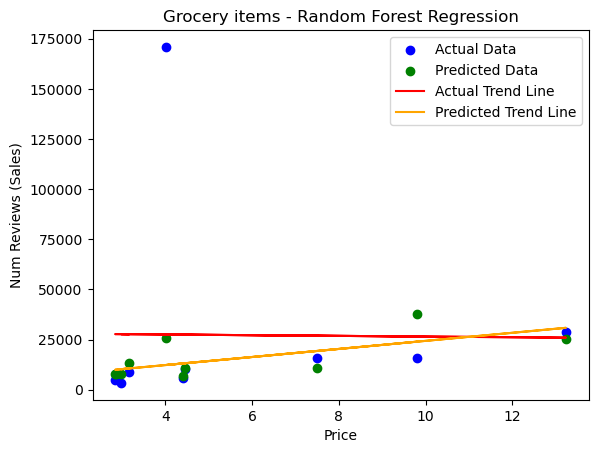

Mean Squared Error: 2168409857.088789
R-squared: 0.07413598201947613

Dataset: Items for babies and kids


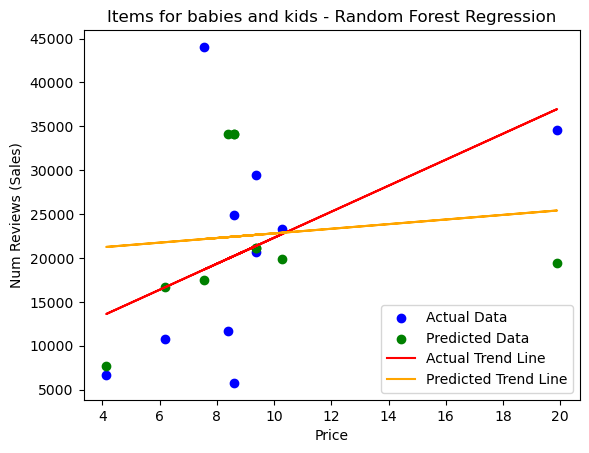

Mean Squared Error: 244317765.63995248
R-squared: -0.7024321742841944

Dataset: Products for pets


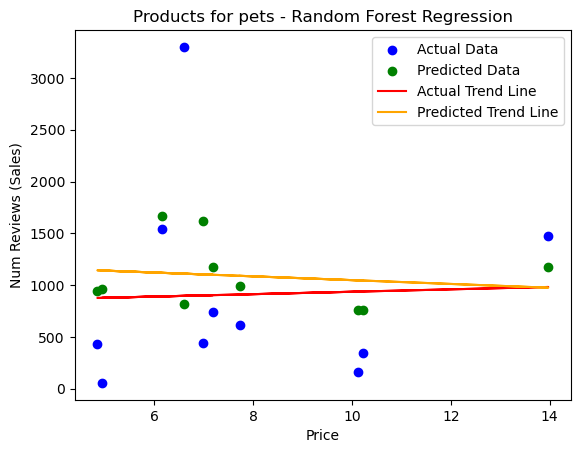

Mean Squared Error: 961753.809951514
R-squared: -0.11746370584227783

                              Dataset  Mean Squared Error  R-squared
0                         Supplements        2.839327e+09   0.250918
1                        Sports items        1.841515e+07  -0.741212
2  Personal care products for bathing        7.664904e+08  -2.069778
3                     Beauty products        5.018989e+08  -0.807424
4                       Grocery items        2.168410e+09   0.074136
5           Items for babies and kids        2.443178e+08  -0.702432
6                   Products for pets        9.617538e+05  -0.117464


In [29]:
# Perform Random Forest Regression: reviews(sales) vs price
results = []  # List to store results of each model
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    
    # Select the features (independent variables) and target variable
    X = dataset[["price"]]  # Using only price as a feature now
    y = dataset["num_reviews(sales)"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Random Forest Regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2})
    
    # Plot the actual vs. predicted values with a trendline
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.scatter(X_test, y_pred, color='green', label='Predicted Data')
    
    # Create trend lines
    z_actual = np.polyfit(X_test.squeeze(), y_test, 1)
    p_actual = np.poly1d(z_actual)
    
    z_predicted = np.polyfit(X_test.squeeze(), y_pred, 1)
    p_predicted = np.poly1d(z_predicted)
    
    plt.plot(X_test, p_actual(X_test), color='red', label='Actual Trend Line')
    plt.plot(X_test, p_predicted(X_test), color='orange', label='Predicted Trend Line')
    
    plt.xlabel("Price")
    plt.ylabel("Num Reviews (Sales)")
    plt.title(f"{name} - Random Forest Regression")
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

# Convert results to a DataFrame and print it
results_df = pd.DataFrame(results)
print(results_df)



Dataset: Supplements


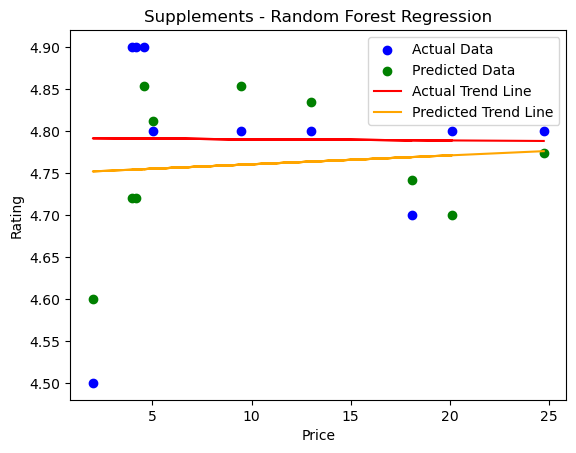

Mean Squared Error: 0.00933321111111161
R-squared: 0.2764952627045273

Dataset: Sports items


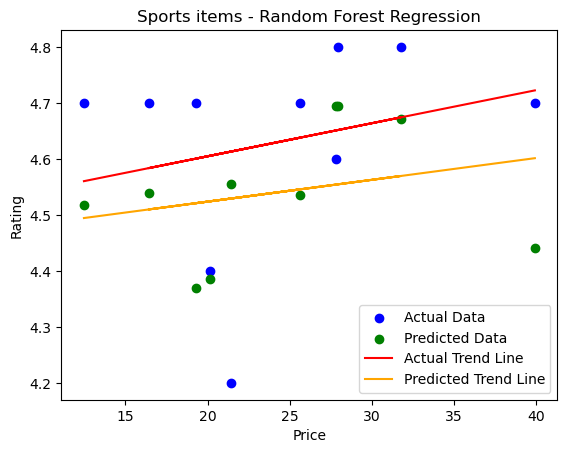

Mean Squared Error: 0.042492799999999775
R-squared: -0.3237632398753838

Dataset: Personal care products for bathing


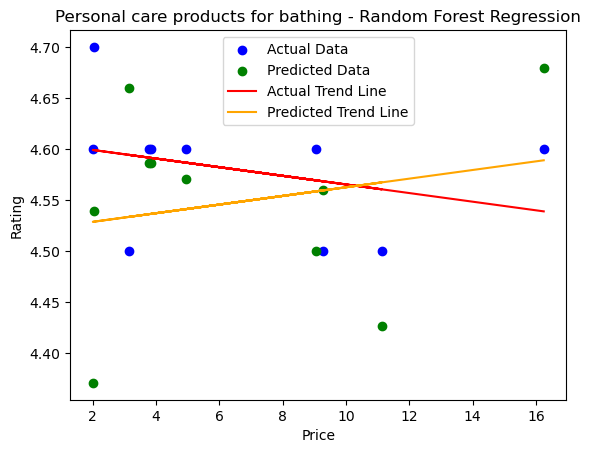

Mean Squared Error: 0.013008241714851996
R-squared: -2.6134004763477807

Dataset: Beauty products


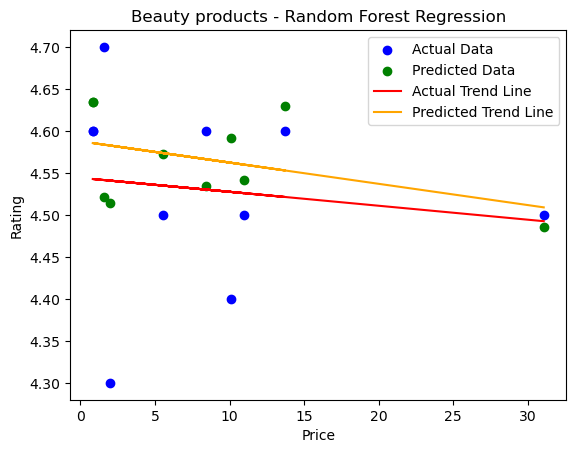

Mean Squared Error: 0.012918548099773556
R-squared: -0.067648603287072

Dataset: Grocery items


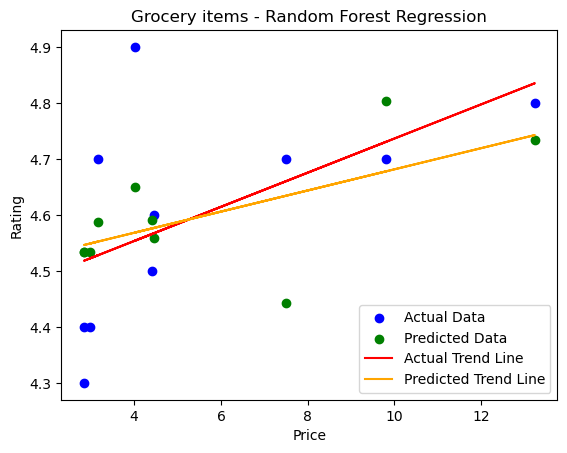

Mean Squared Error: 0.02572193124999968
R-squared: 0.24347261029412726

Dataset: Items for babies and kids


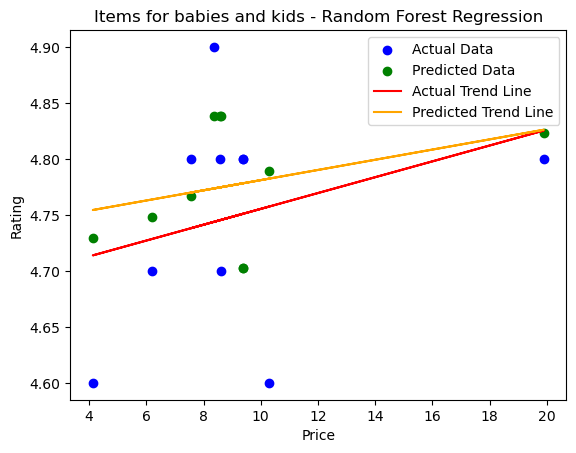

Mean Squared Error: 0.00994340000000019
R-squared: -0.1698117647059021

Dataset: Products for pets


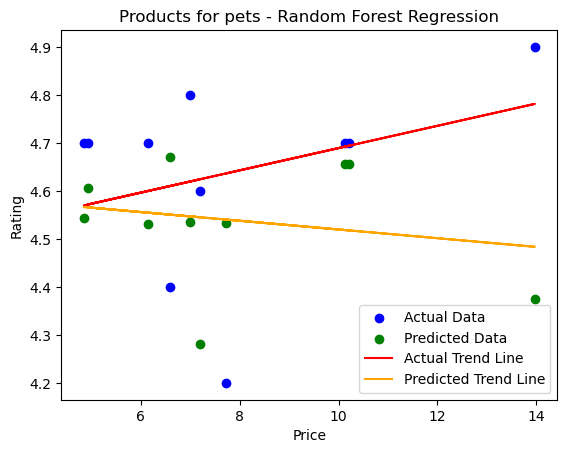

Mean Squared Error: 0.06980700847222183
R-squared: -0.917774958028073

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775


In [30]:
#Random Forest Regression: price vs rating
# Perform Random Forest Regression for each dataset
results = []  # List to store results of each model
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    
    # Select the features (independent variables) and target variable
    X = dataset[["price"]]
    y = dataset["rating"]  # Using rating as the target variable now
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Random Forest Regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2})
    
    # Plot the actual vs. predicted values with a trendline
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.scatter(X_test, y_pred, color='green', label='Predicted Data')
    
    # Create trend lines
    z_actual = np.polyfit(X_test.squeeze(), y_test, 1)
    p_actual = np.poly1d(z_actual)
    
    z_predicted = np.polyfit(X_test.squeeze(), y_pred, 1)
    p_predicted = np.poly1d(z_predicted)
    
    plt.plot(X_test, p_actual(X_test), color='red', label='Actual Trend Line')
    plt.plot(X_test, p_predicted(X_test), color='orange', label='Predicted Trend Line')
    
    plt.xlabel("Price")
    plt.ylabel("Rating")
    plt.title(f"{name} - Random Forest Regression")
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

# Convert results to a DataFrame and print it
results_df = pd.DataFrame(results)
print(results_df)

Dataset: Supplements


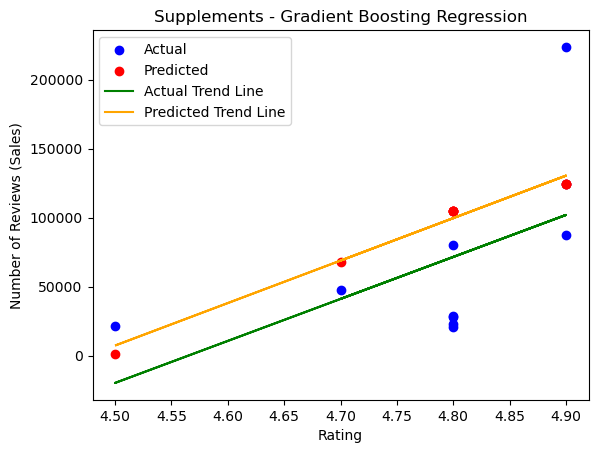

Mean Squared Error: 3793375082.551201
R-squared: -0.0007824871233206299

Dataset: Sports items


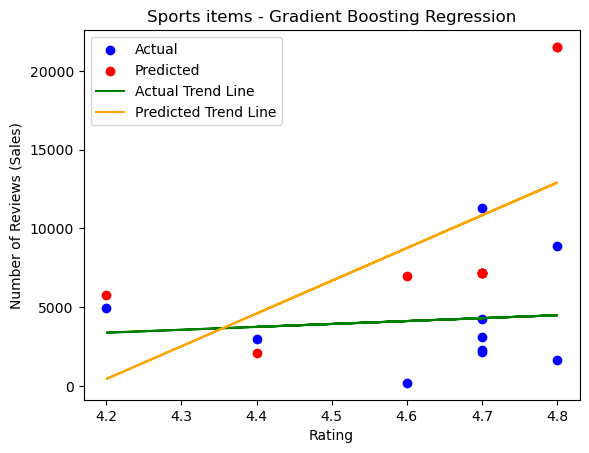

Mean Squared Error: 69453184.94555505
R-squared: -5.567021019562093

Dataset: Personal care products for bathing


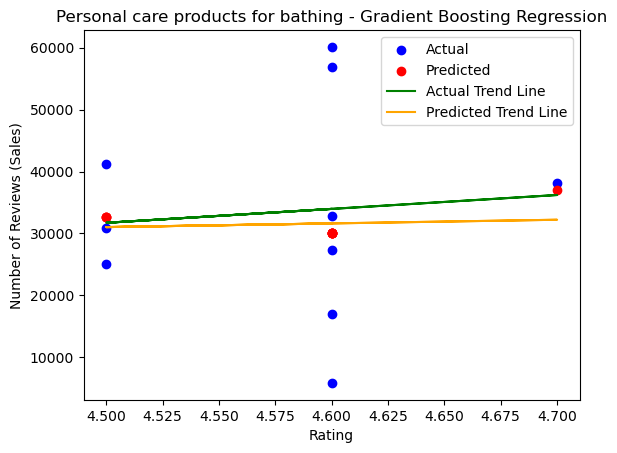

Mean Squared Error: 254019563.55459356
R-squared: -0.017343101392026217

Dataset: Beauty products


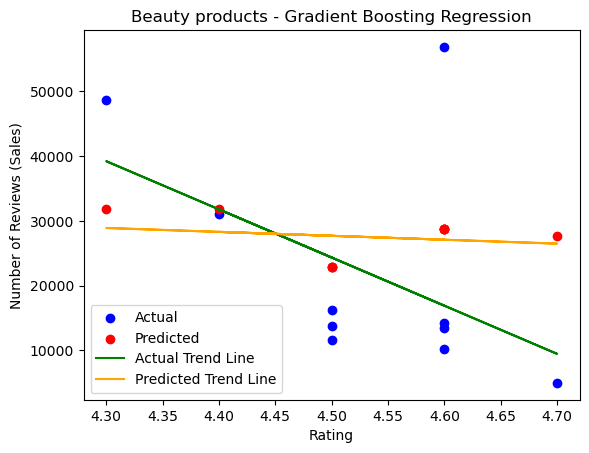

Mean Squared Error: 263343006.13885075
R-squared: 0.051656479038651004

Dataset: Grocery items


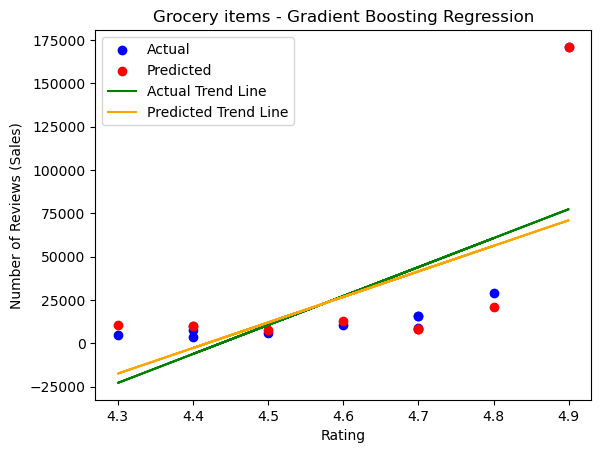

Mean Squared Error: 25709180.528599136
R-squared: 0.9890227370506641

Dataset: Items for babies and kids


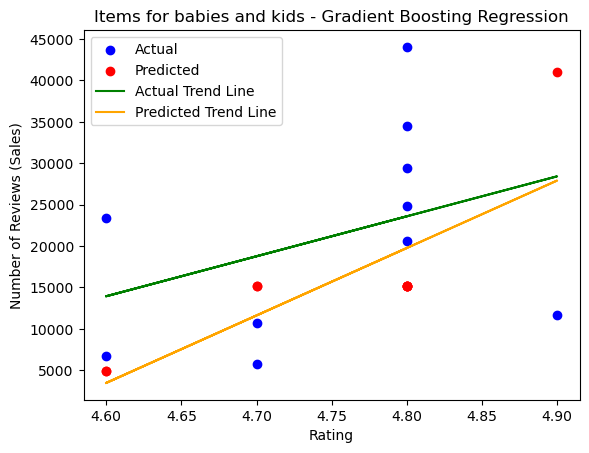

Mean Squared Error: 284806533.6721889
R-squared: -0.9845622159316316

Dataset: Products for pets


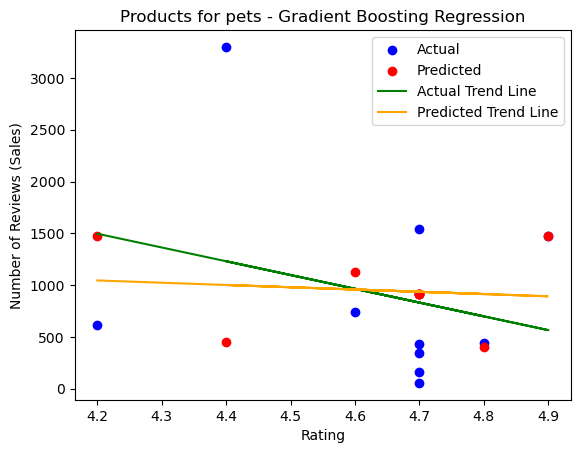

Mean Squared Error: 1126070.1914441152
R-squared: -0.3083832433511262



In [42]:
#Gradient Boosting Regression: review(sales) vs rating
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    
    # Select the features (independent variables) and target variable
    X = dataset[["rating"]]
    y = dataset["num_reviews(sales)"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Gradient Boosting Regression model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot the actual vs. predicted values with trend lines
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.scatter(X_test, y_pred, color='red', label="Predicted")
    plt.plot(X_test, np.poly1d(np.polyfit(X_test.squeeze(), y_test.squeeze(), 1))(X_test), color='green', label="Actual Trend Line")
    plt.plot(X_test, np.poly1d(np.polyfit(X_test.squeeze(), y_pred.squeeze(), 1))(X_test), color='orange', label="Predicted Trend Line")
    plt.xlabel("Rating")
    plt.ylabel("Number of Reviews (Sales)")
    plt.title(f"{name} - Gradient Boosting Regression")
    plt.legend()
    plt.show()
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()



Dataset: Supplements


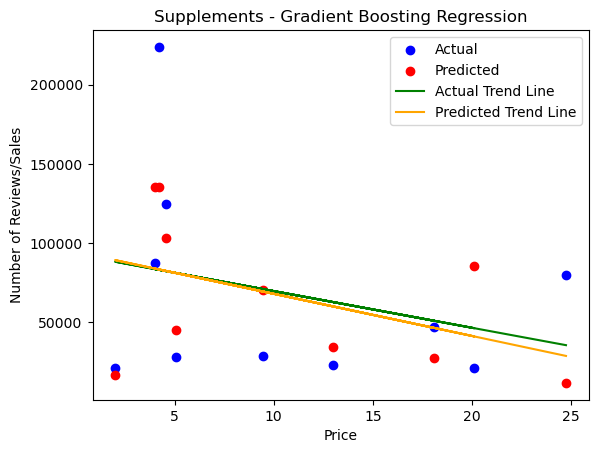

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 2196721934.8949804
R-squared: 0.4204525538128411

Dataset: Sports items


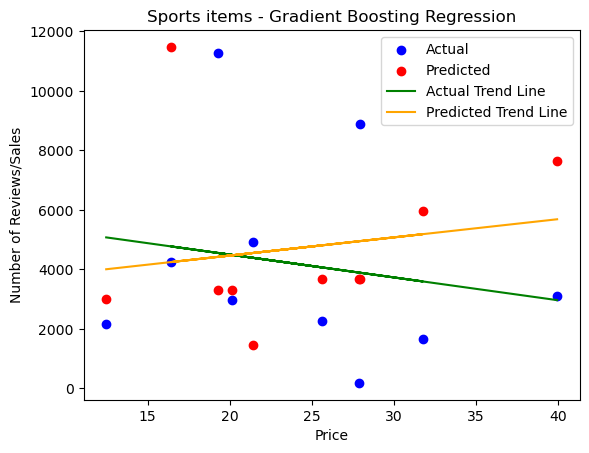

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 20926023.292581223
R-squared: -0.9786225055906774

Dataset: Personal care products for bathing


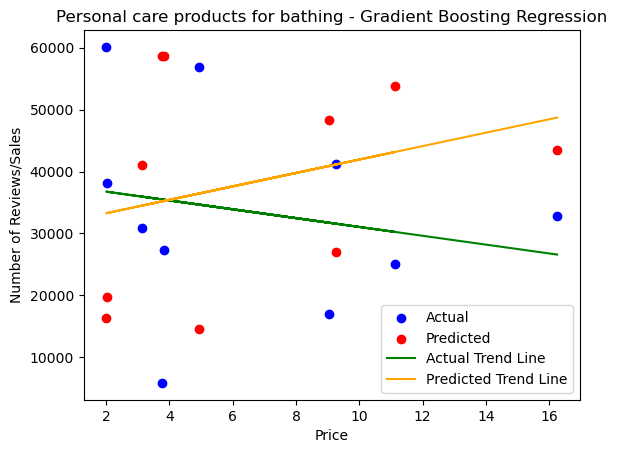

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 1007716941.0244099
R-squared: -3.0358855190565874

Dataset: Beauty products


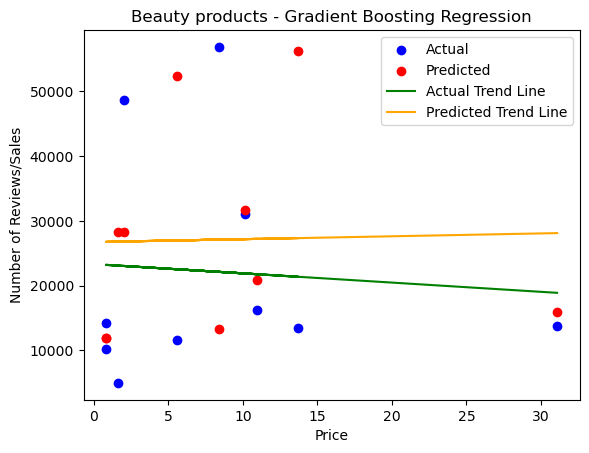

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 638743546.9312531
R-squared: -1.3002255240024758

Dataset: Grocery items


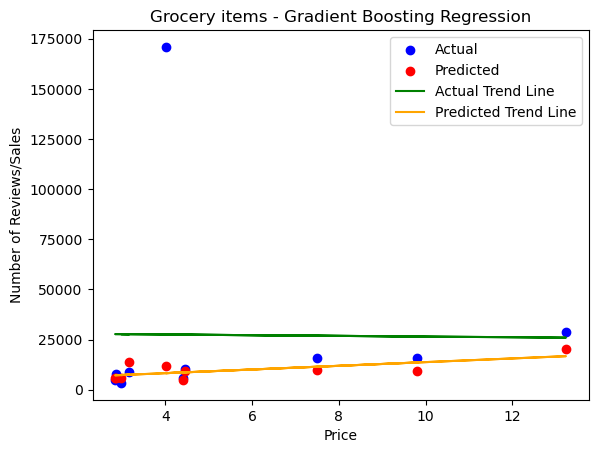

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 2543861875.744784
R-squared: -0.08617389363218408

Dataset: Items for babies and kids


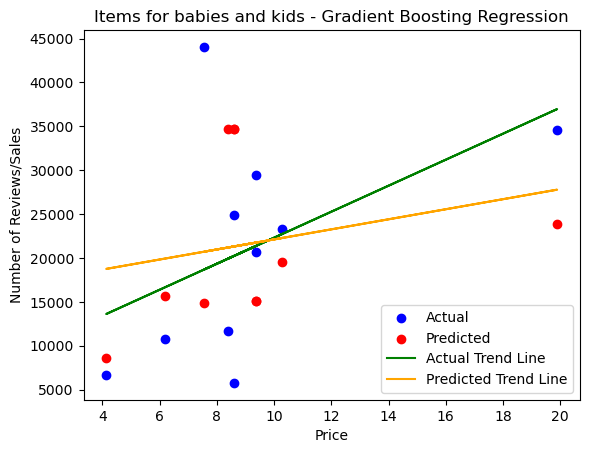

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 270073255.20139927
R-squared: -0.881899164656333

Dataset: Products for pets


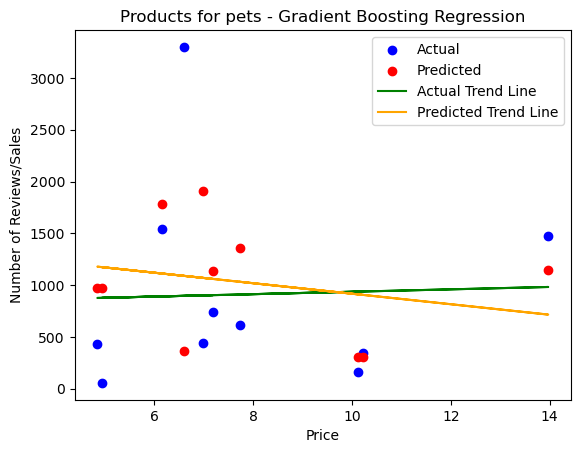

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 1280770.26868702
R-squared: -0.48812957741416274



In [41]:
# Perform Gradient Boosting Regression: review(sales) vs price
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    
    # Select the features (independent variables) and target variable
    X = dataset[["price"]]
    y = dataset["num_reviews(sales)"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Gradient Boosting Regression model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot the actual vs. predicted values with trend lines
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.scatter(X_test, y_pred, color='red', label="Predicted")
    plt.plot(X_test, np.poly1d(np.polyfit(X_test.squeeze(), y_test.squeeze(), 1))(X_test), color='green', label="Actual Trend Line")
    plt.plot(X_test, np.poly1d(np.polyfit(X_test.squeeze(), y_pred.squeeze(), 1))(X_test), color='orange', label="Predicted Trend Line")
    plt.xlabel("Price")
    plt.ylabel("Number of Reviews/Sales")
    plt.title(f"{name} - Gradient Boosting Regression")
    plt.legend()
    plt.show()

    results_df = pd.DataFrame(results)
    print(results_df)
    
    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()


Dataset: Supplements


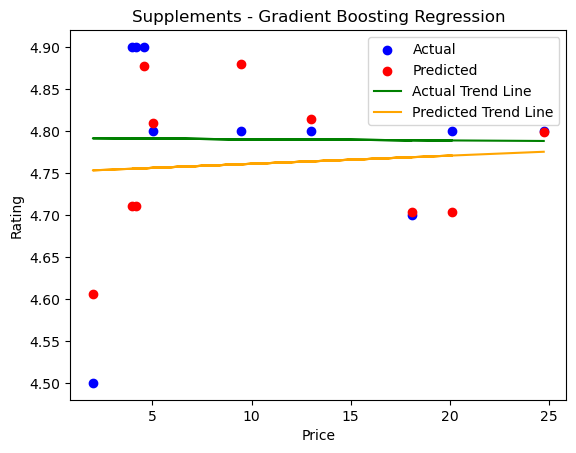

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.009916898539405092
R-squared: 0.23124817523991636

Dataset: Sports items


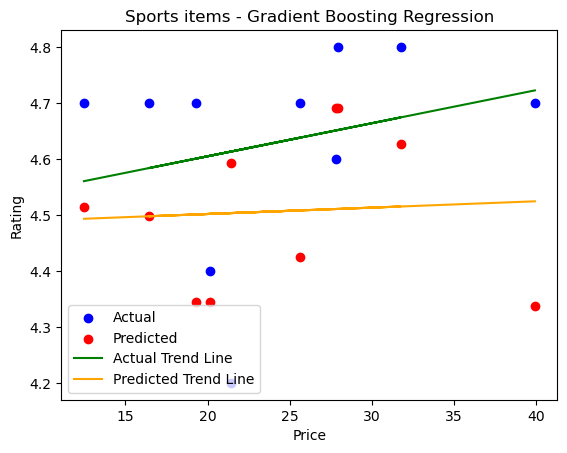

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.06155542797037948
R-squared: -0.9176145785164969

Dataset: Personal care products for bathing


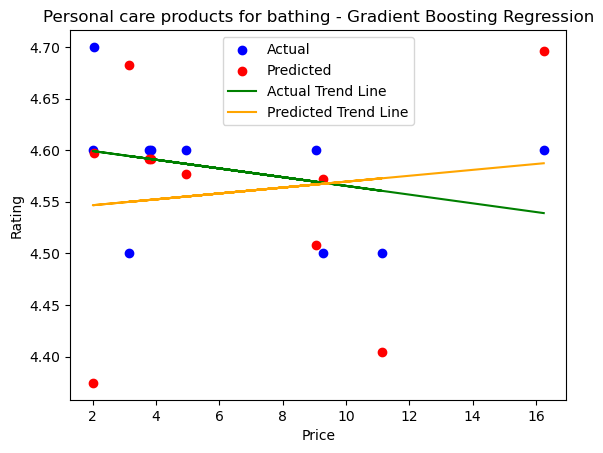

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.012731483208116295
R-squared: -2.536523113365642

Dataset: Beauty products


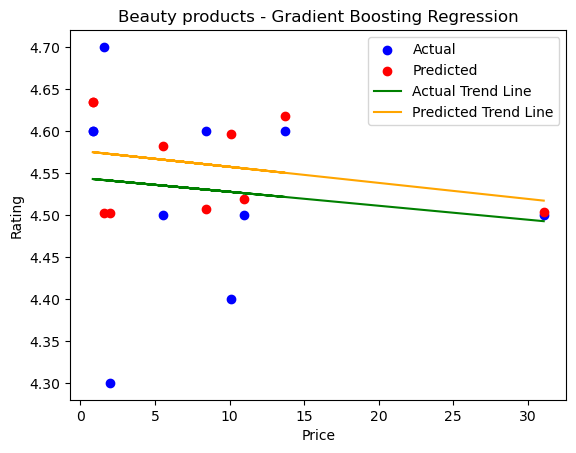

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.013721530019001357
R-squared: -0.1340107453720143

Dataset: Grocery items


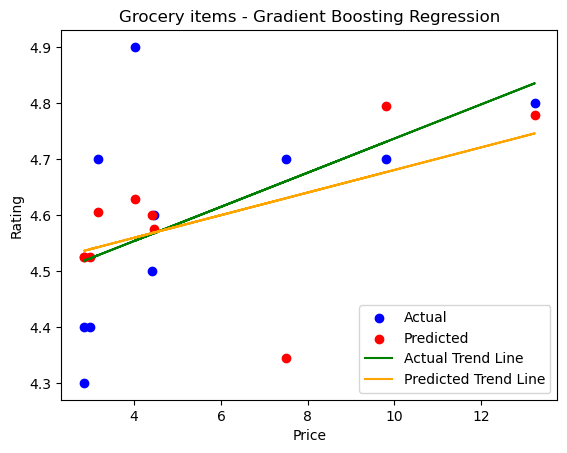

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.030987537981707548
R-squared: 0.08860182406742534

Dataset: Items for babies and kids


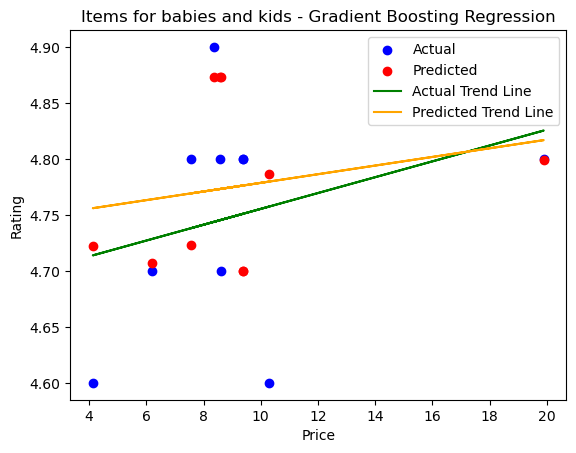

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.011186147588683136
R-squared: -0.3160173633744834

Dataset: Products for pets


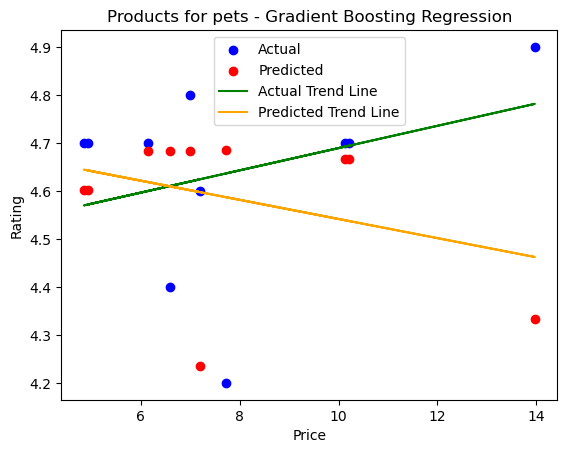

                              Dataset  Mean Squared Error  R-squared
0                         Supplements            0.009333   0.276495
1                        Sports items            0.042493  -0.323763
2  Personal care products for bathing            0.013008  -2.613400
3                     Beauty products            0.012919  -0.067649
4                       Grocery items            0.025722   0.243473
5           Items for babies and kids            0.009943  -0.169812
6                   Products for pets            0.069807  -0.917775
Mean Squared Error: 0.0804097835552311
R-squared: -1.2090599877810746



In [40]:
# Perform Gradient Boosting Regression: rating vs price
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    
    # Select the features (independent variables) and target variable
    X = dataset[["price"]]
    y = dataset["rating"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Gradient Boosting Regression model
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Plot the actual vs. predicted values with trend lines
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.scatter(X_test, y_pred, color='red', label="Predicted")
    plt.plot(X_test, np.poly1d(np.polyfit(X_test.squeeze(), y_test.squeeze(), 1))(X_test), color='green', label="Actual Trend Line")
    plt.plot(X_test, np.poly1d(np.polyfit(X_test.squeeze(), y_pred.squeeze(), 1))(X_test), color='orange', label="Predicted Trend Line")
    plt.xlabel("Price")
    plt.ylabel("Rating")
    plt.title(f"{name} - Gradient Boosting Regression")
    plt.legend()
    plt.show()
    
    # Convert results to a DataFrame and print it
    results_df = pd.DataFrame(results)
    print(results_df)

    # Print the evaluation metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()

Dataset: Supplements


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


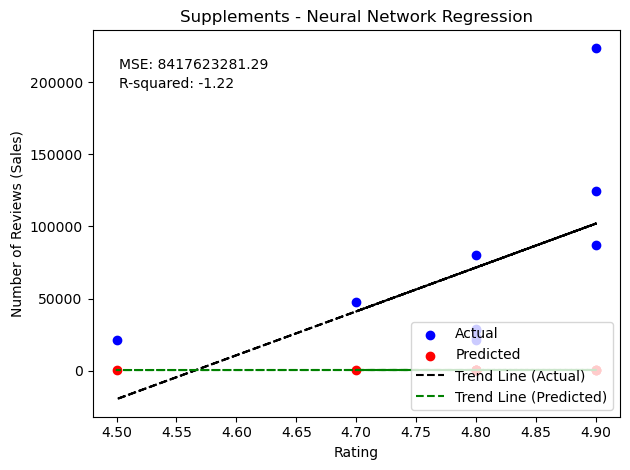

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Sports items


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


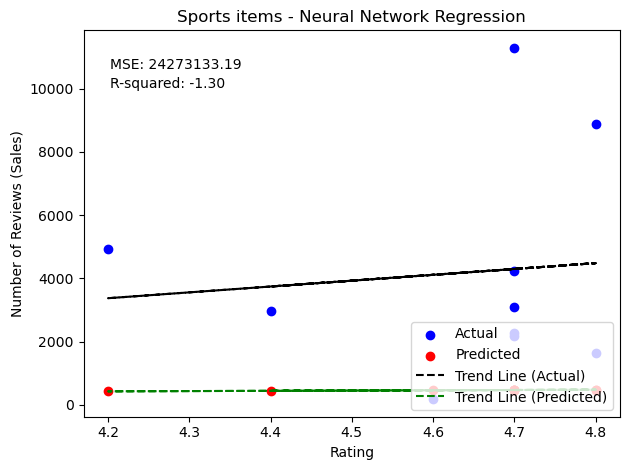

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Personal care products for bathing


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


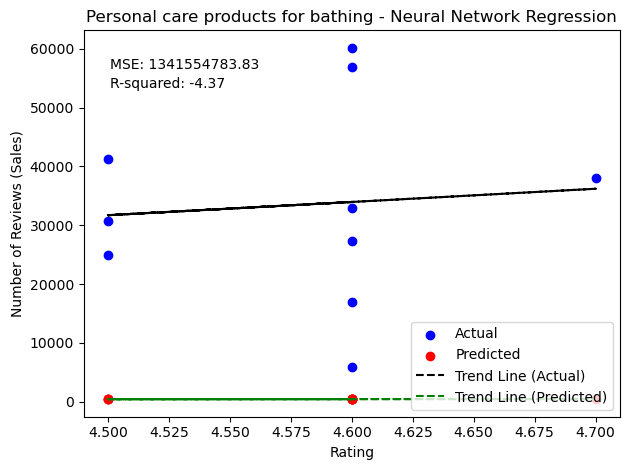

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Beauty products


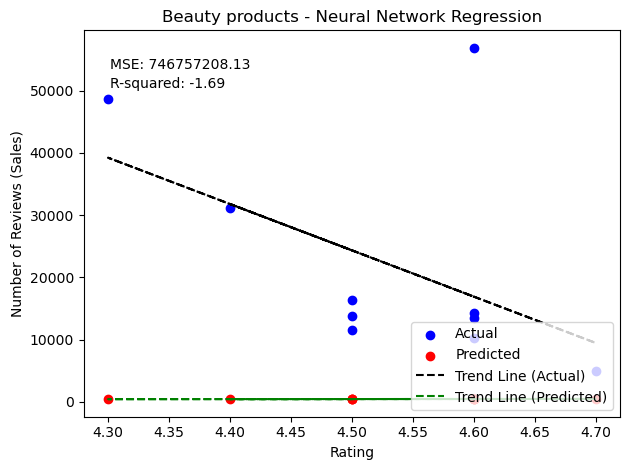

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Grocery items


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


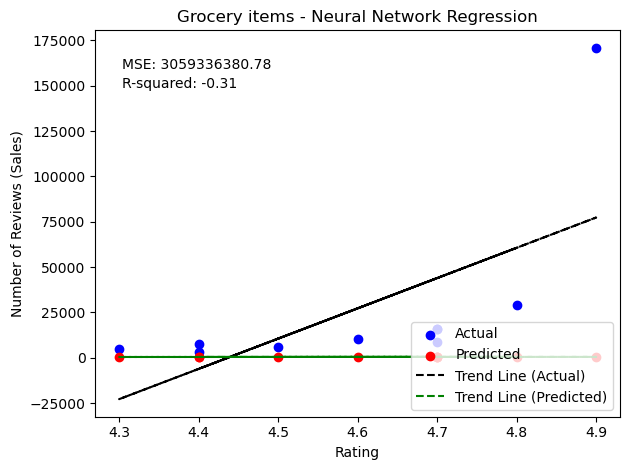

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Items for babies and kids


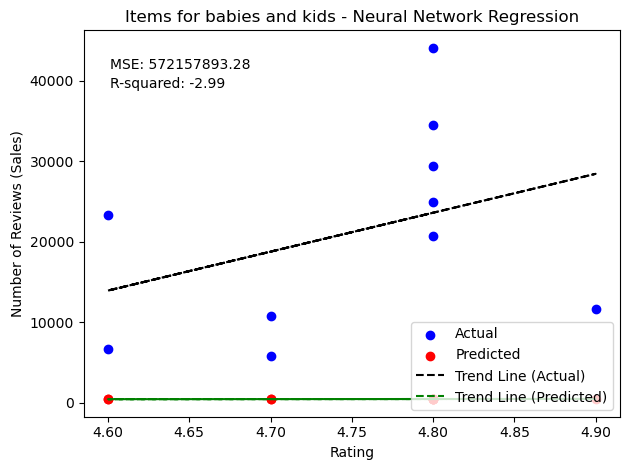

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Products for pets


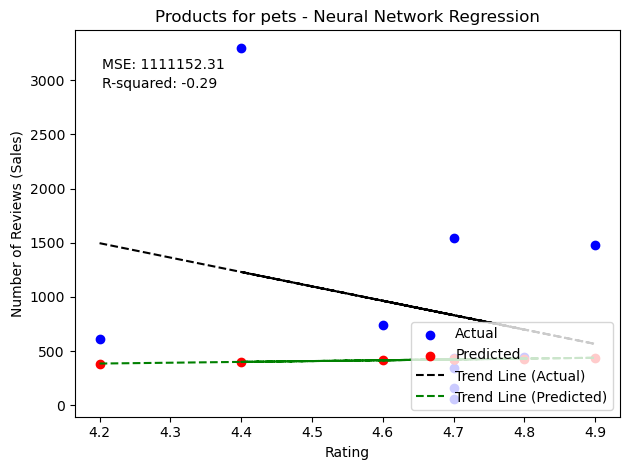

Results:
                              Dataset  Mean Squared Error  R-squared
0                         Supplements        8.417623e+09  -1.220769
1                        Sports items        2.427313e+07  -1.295102
2  Personal care products for bathing        1.341555e+09  -4.372899
3                     Beauty products        7.467572e+08  -1.689201
4                       Grocery items        3.059336e+09  -0.306270
5           Items for babies and kids        5.721579e+08  -2.986857
6                   Products for pets        1.111152e+06  -0.291050


/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/217960817.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


In [24]:
# Neural Netowrk: Number of reviews (sales) vs rating
results_df = pd.DataFrame(columns=["Dataset", "Mean Squared Error", "R-squared"])
for name, dataset in datasets.items():
    print(f"Dataset: {name}")

    # Select the features (independent variables) and target variable
    X = dataset[["rating"]]
    y = dataset["num_reviews(sales)"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Neural Network regression model
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the trend lines
    actual_trend = np.polyfit(X_test.squeeze(), y_test, 1)
    predicted_trend = np.polyfit(X_test.squeeze(), y_pred, 1)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot the actual vs. predicted values with trend lines
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.scatter(X_test, y_pred, color='red', label="Predicted")
    plt.plot(X_test.squeeze(), np.polyval(actual_trend, X_test.squeeze()), color='black', label="Trend Line (Actual)", linestyle='--')
    plt.plot(X_test.squeeze(), np.polyval(predicted_trend, X_test.squeeze()), color='green', label="Trend Line (Predicted)", linestyle='--')

    # Display MSE and R-squared values in the plot
    plt.text(0.05, 0.9, f"MSE: {mse:.2f}", transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes)

    plt.xlabel("Rating")
    plt.ylabel("Number of Reviews (Sales)")
    plt.title(f"{name} - Neural Network Regression")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    # Store the results in the DataFrame
    results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)

# Display the results table
print("Results:")
print(results_df)



Dataset: Supplements


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


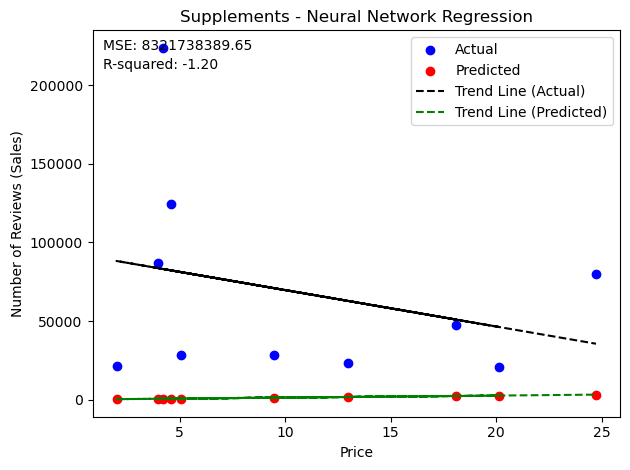

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Sports items


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


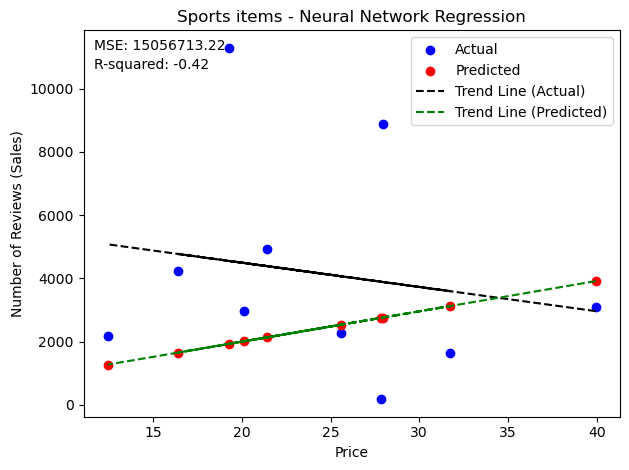

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Personal care products for bathing


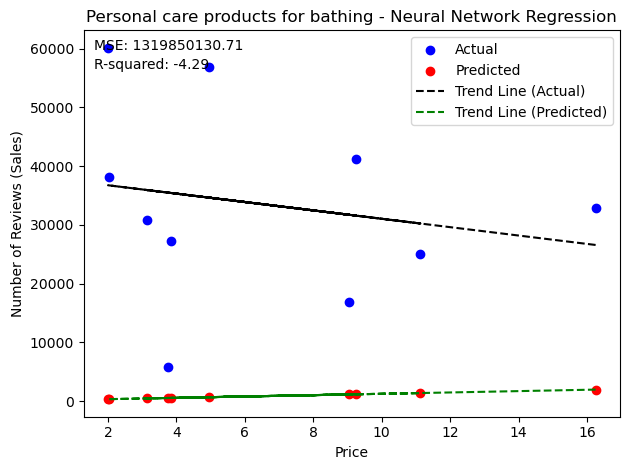

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Beauty products


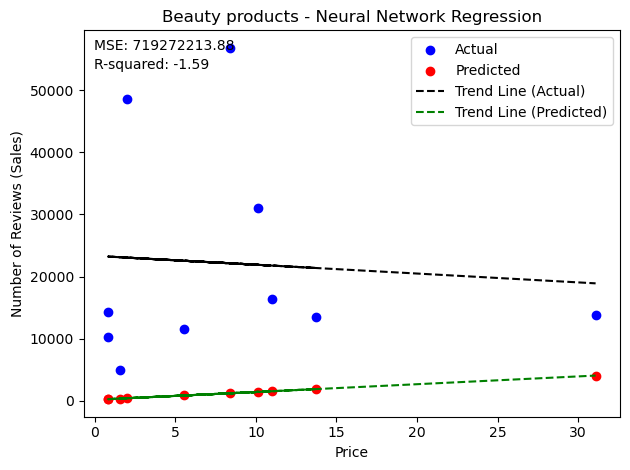

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Grocery items


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


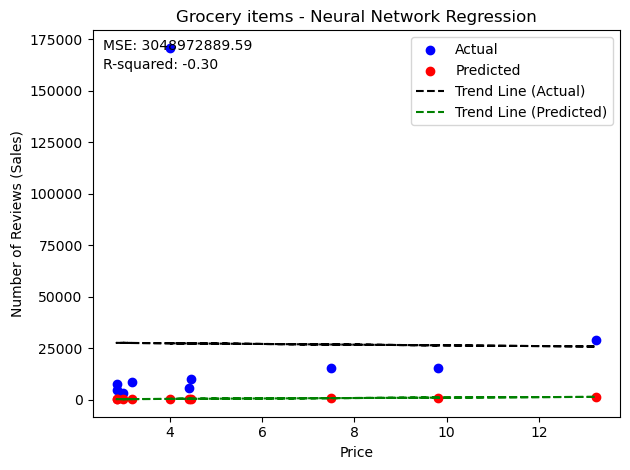

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Items for babies and kids


/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


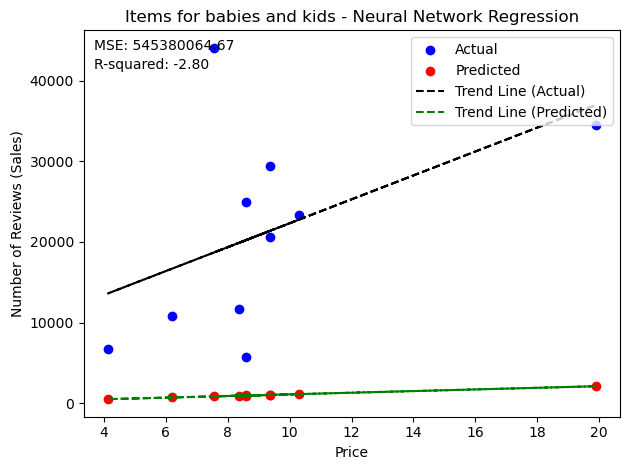

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)
/Users/user/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Products for pets


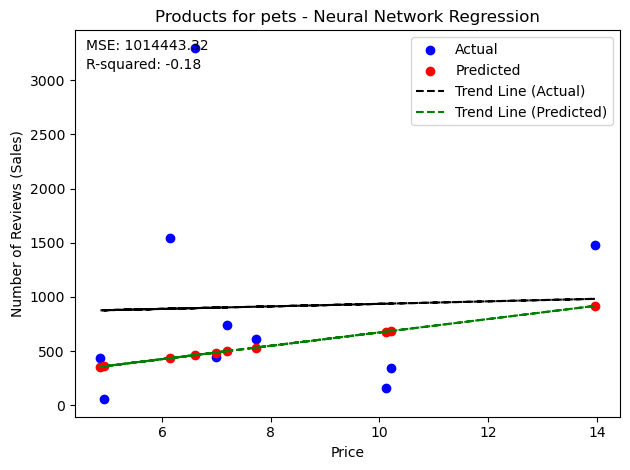

Results:
                              Dataset  Mean Squared Error  R-squared
0                         Supplements        8.321738e+09  -1.195472
1                        Sports items        1.505671e+07  -0.423660
2  Personal care products for bathing        1.319850e+09  -4.285972
3                     Beauty products        7.192722e+08  -1.590223
4                       Grocery items        3.048973e+09  -0.301845
5           Items for babies and kids        5.453801e+08  -2.800266
6                   Products for pets        1.014443e+06  -0.178684


/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3573054114.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


In [27]:
# Neural Network: number of eviews(sales) vs price
results_df = pd.DataFrame(columns=["Dataset", "Mean Squared Error", "R-squared"])
for name, dataset in datasets.items():
    print(f"Dataset: {name}")

    # Select the features (independent variables) and target variable
    X = dataset[["price"]]
    y = dataset["num_reviews(sales)"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Neural Network regression model
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the trend lines
    actual_trend = np.polyfit(X_test.squeeze(), y_test, 1)
    predicted_trend = np.polyfit(X_test.squeeze(), y_pred, 1)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot the actual vs. predicted values with trend lines
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.scatter(X_test, y_pred, color='red', label="Predicted")
    plt.plot(X_test.squeeze(), np.polyval(actual_trend, X_test.squeeze()), color='black', label="Trend Line (Actual)", linestyle='--')
    plt.plot(X_test.squeeze(), np.polyval(predicted_trend, X_test.squeeze()), color='green', label="Trend Line (Predicted)", linestyle='--')

    # Display MSE and R-squared values in the plot
    plt.text(0.02, 0.95, f"MSE: {mse:.2f}", transform=plt.gca().transAxes, horizontalalignment='left')
    plt.text(0.02, 0.90, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes, horizontalalignment='left')

    plt.xlabel("Price")
    plt.ylabel("Number of Reviews (Sales)")
    plt.title(f"{name} - Neural Network Regression")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # Store the results in the DataFrame
    results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)

# Display the results table
print("Results:")
print(results_df)


Dataset: Supplements


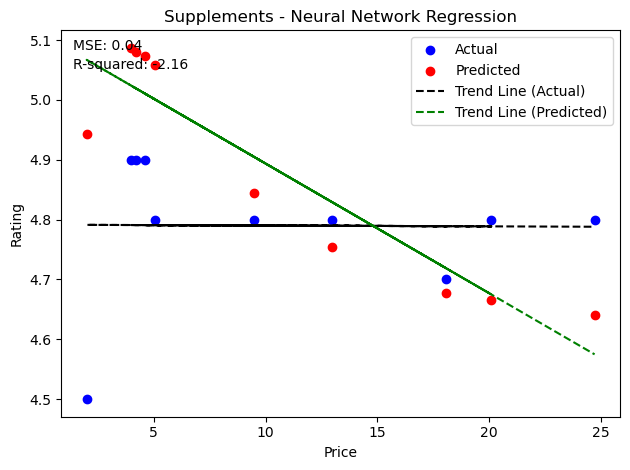

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Sports items


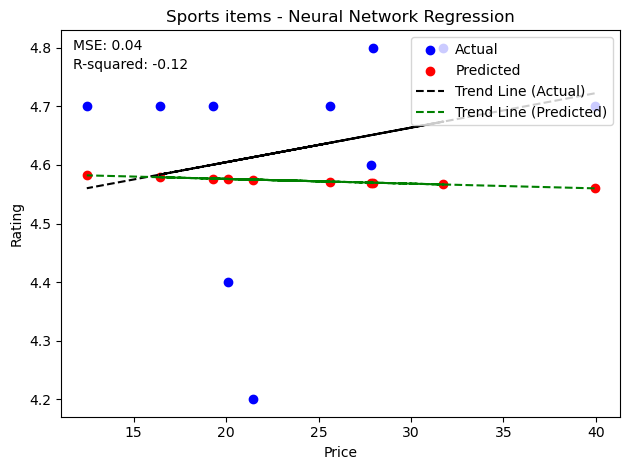

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Personal care products for bathing


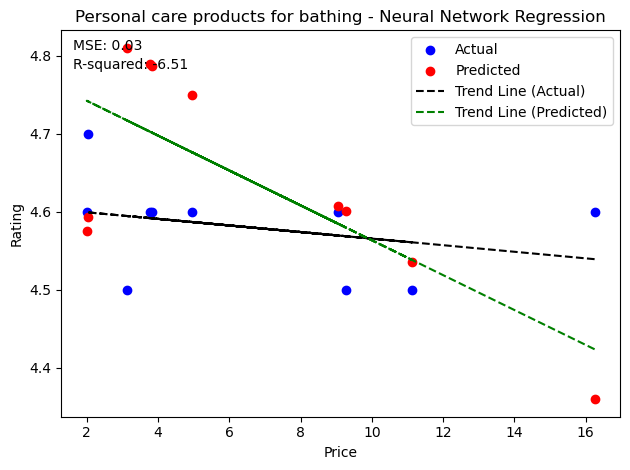

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Beauty products


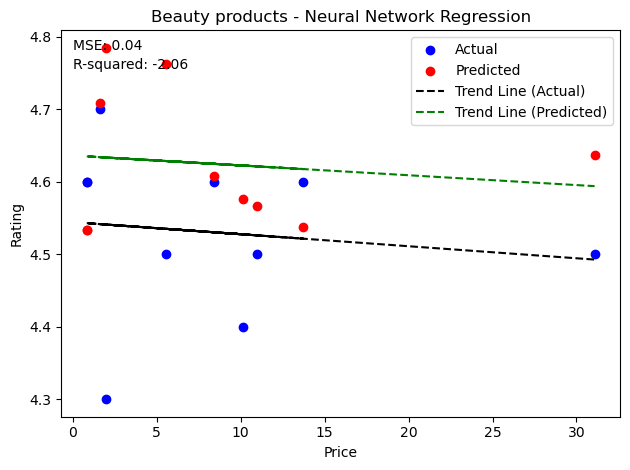

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Grocery items


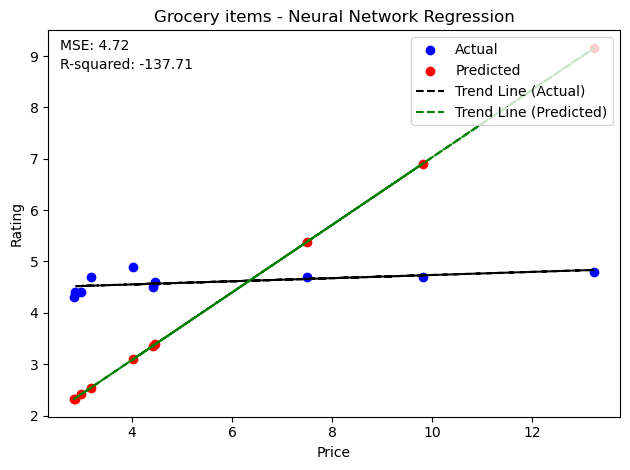

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Items for babies and kids


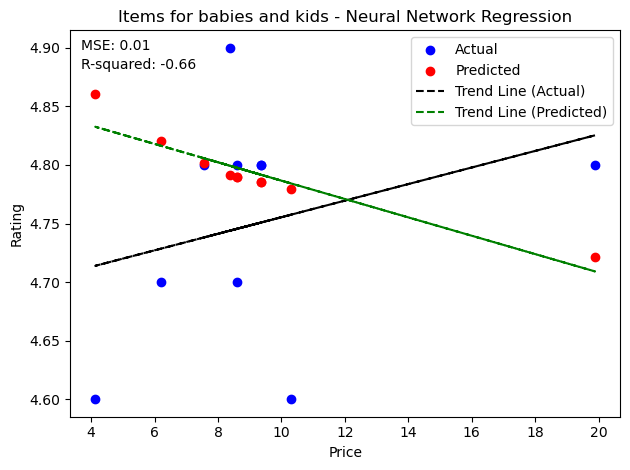

/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


Dataset: Products for pets


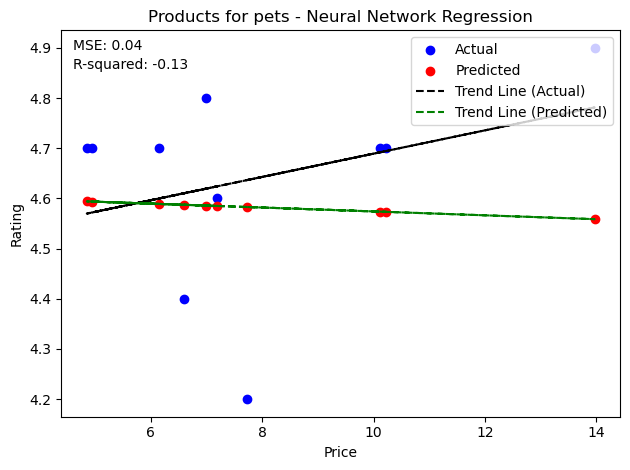

Results:
                              Dataset  Mean Squared Error   R-squared
0                         Supplements            0.040798   -2.162602
1                        Sports items            0.035910   -0.118703
2  Personal care products for bathing            0.027042   -6.511748
3                     Beauty products            0.037018   -2.059365
4                       Grocery items            4.716242 -137.713004
5           Items for babies and kids            0.014105   -0.659428
6                   Products for pets            0.041113   -0.129489


/var/folders/c2/xhd7ptrj7t5dqs_k6vhk7g940000gn/T/ipykernel_6140/3458569302.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)


In [28]:
#Neural Network Regression: Price vs Rating
results_df = pd.DataFrame(columns=["Dataset", "Mean Squared Error", "R-squared"])
for name, dataset in datasets.items():
    print(f"Dataset: {name}")

    # Select the features (independent variables) and target variable
    X = dataset[["price"]]
    y = dataset["rating"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Neural Network regression model
    model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the trend lines
    actual_trend = np.polyfit(X_test.squeeze(), y_test, 1)
    predicted_trend = np.polyfit(X_test.squeeze(), y_pred, 1)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plot the actual vs. predicted values with trend lines
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.scatter(X_test, y_pred, color='red', label="Predicted")
    plt.plot(X_test.squeeze(), np.polyval(actual_trend, X_test.squeeze()), color='black', label="Trend Line (Actual)", linestyle='--')
    plt.plot(X_test.squeeze(), np.polyval(predicted_trend, X_test.squeeze()), color='green', label="Trend Line (Predicted)", linestyle='--')

    # Display MSE and R-squared values in the plot
    plt.text(0.02, 0.95, f"MSE: {mse:.2f}", transform=plt.gca().transAxes, horizontalalignment='left')
    plt.text(0.02, 0.90, f"R-squared: {r2:.2f}", transform=plt.gca().transAxes, horizontalalignment='left')

    plt.xlabel("Price")
    plt.ylabel("Rating")
    plt.title(f"{name} - Neural Network Regression")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # Store the results in the DataFrame
    results_df = results_df.append({"Dataset": name, "Mean Squared Error": mse, "R-squared": r2}, ignore_index=True)

# Display the results table
print("Results:")
print(results_df)
